<a href="https://colab.research.google.com/github/Rogerio-mack/Temporal/blob/main/cap1_IntrodTimeSeriesV4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução às Séries Temporais** 

___


Neste capítulo você vai aprender sobre:

* Os principais conceitos e aplicações das Séries Temporais 
* A decomposição de Série Temporais em Tendência, Ciclos, Sazonalidade e Resíduos e como isso pode ser empregado para previsões
* e os primeiros passos de como empregar o `Python` suas análises de Séries Temporais





Séries Temporais desempenham um papel importante no nosso dia a dia. Fenômenos físicos, transações de negócios, dispositivos produzem constantemente dados ao longo do tempo. Esses dados podem, então, serem empregados para previsões, análises etc. Neste capítulo você vai entender o que caracteriza esses dados que conhecemos como Séries Temporais, como elas podem ser descompostas em dados mais simples para análise e como empregar o `Python` para iniciar a manipulação dessas séries dados.




In [1]:
#@markdown `imports`
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt             
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as ticker

from datetime import datetime as dt

path = 'https://github.com/Rogerio-mack/Temporal/raw/main/Data/'
plt.style.use([ 'grayscale' , 'https://github.com/Rogerio-mack/Temporal/raw/main/tsp.mplstyle' ])

# Para ver os parâmetros empregados aqui
# plt.rcParams
# plt.rcParams['figure.figsize']

In [2]:
#@markdown `tspplot()`
def tspplot(ts=None,label=None,title=None,ax=None,linestyle='solid',alpha=1,lw=1,nr_xticks=None,nr_yticks=None):
  
  import matplotlib.ticker as ticker

  if ax is None:
    fig, ax = plt.subplots()
  
  if label is not None:
    ax.plot(ts, label=label, linestyle=linestyle, lw=lw)
  else:
    ax.plot(ts, linestyle=linestyle,lw=lw,alpha=alpha)

  if title is not None:
    ax.set_title(title)

  if nr_xticks is not None:
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nr_xticks))

  if nr_yticks is not None:
    ax.yaxis.set_major_locator(ticker.MaxNLocator(nr_yticks))  
  
  if label is not None:
    plt.legend()

  plt.tight_layout()

  return



In [3]:
#@markdown `tspdisplay()`
class tspdisplay(object):
    # Adaptado de https://jakevdp.github.io/PythonDataScienceHandbook/index.html
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <hr>
    <h3 style='font-family:"Courier New", Courier, monospace'>{0}</h3><hr>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a + '.head()')._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a + '.head()'))
                           for a in self.args)

# Quick Start

Neste *Quick Start* você vai aprender alguns comandos básicos de `Python` para poder manipular de forma simples séries de dados. Muitos desses comandos serão utilizados e melhor detalhados neste e nos capítulos seguintes. Certamente será útil você voltar neste *Quick Start* quando precisar dessas operações. 

## Aquisição dos dados
### `DataFrame`, `pd.read_csv()`

Uma série temporal é um conjunto de observações no tempo. Essas observações estão geralmente armazenadas em tabelas ou bancos de dados. Uma forma simples para acessar essas tabelas é empregar o `Pandas` que é uma biblioteca de manipulação de dados em `Python`. O `Pandas` permite obter dados em vários formatos de planilhas e bancos de dados. Aqui, na maior parte dos casos vamos trabalhar com planilhas em formato `.csv`. Esses dados são trazidos no formato de um `DataFrame`.



In [4]:
#@markdown
%%capture
!pip install yfinance
!pip install yahoofinancials

In [5]:
#@markdown
from yahoofinancials import YahooFinancials

stock_name = 'EMBR3.SA'

yahoo_financials = YahooFinancials(stock_name)
data=yahoo_financials.get_historical_price_data("2000-01-01", "2022-08-31", "daily")

df = pd.DataFrame(data[stock_name]['prices'])

df.to_csv('embr3.csv',index=None)


In [6]:
import pandas as pd

df = pd.read_csv('/content/embr3.csv')

display(df.head())

,date,high,low,open,close,volume,adjclose,formatted_date
0,946900800,7.758318,7.005253,7.758318,7.162872,1121444.0,6.064209,2000-01-03
1,946987200,6.830122,6.304728,6.830122,6.304728,1432068.0,5.337687,2000-01-04
2,947073600,6.593695,6.217162,6.453590,6.541155,1100888.0,5.537851,2000-01-05
3,947160000,6.479859,6.304728,6.479859,6.330998,523036.0,5.359928,2000-01-06
4,947246400,6.567425,6.348511,6.558669,6.523642,480782.0,5.523024,2000-01-07


Aqui nossa série de dados são valores diários das ações da empresa Embraer (EMBR3.SA).

## Índices
### `df.index`, `tspdisplay()`

Como você ver no `display` anterior cada observação tem um número sequencial $0, 1, 2, ...$ . No `Pandas` esse valor é o *índice* dos registros da tabela. No caso de Séries Temporais, entretanto, é mais útil para uma série de operações empregarmos a série de tempo como índice dos dados. Isso pode ser feito diversas formas como empregar um campo de data existente da tabela como abaixo.

In [7]:
df.index = pd.to_datetime(df['formatted_date'])
tspdisplay('df')

,date,high,low,open,close,volume,adjclose,formatted_date
formatted_date,,,,,,,,
2000-01-03,946900800,7.758318,7.005253,7.758318,7.162872,1121444.0,6.064209,2000-01-03
2000-01-04,946987200,6.830122,6.304728,6.830122,6.304728,1432068.0,5.337687,2000-01-04
2000-01-05,947073600,6.593695,6.217162,6.453590,6.541155,1100888.0,5.537851,2000-01-05
2000-01-06,947160000,6.479859,6.304728,6.479859,6.330998,523036.0,5.359928,2000-01-06
2000-01-07,947246400,6.567425,6.348511,6.558669,6.523642,480782.0,5.523024,2000-01-07


Note que o campo precisará estar em um formato `datetime` (e não como uma `string`). Note também que empregamos aqui a função `tspdisplay('df')` - note também o `'df'` entre aspas - em lugar do `display(df)` anterior. Essa função nossa tem apenas como objetivo produzir aqui uma apresentação melhor para você dos dados e você pode substituí-la pela função `display` do `Python` sempre que quiser. 

## Seleção dos dados
### `df[ <seleção de linhas ][[ <seleção de colunas> ]]`

Na maior parte do tempo estaremos interessados em uma única Série de dados. Selecionar da tabela somente a Série de dados de interesse e eliminar os demais tornará uma série de operações bastante mais simples não obrigando a referência ao atributo do valor desejado a todo momento. Além disso, muitas vezes você pode querer selecionar apenas um intervalo de tempo da Série.

In [8]:
df = df[df.index.year >= 2015][['close']]
df.index.name = ''

tspdisplay('df')

,close
,
2015-01-02,24.850000
2015-01-05,24.299999
2015-01-06,23.860001
2015-01-07,23.680000
2015-01-08,23.000000


Nosso dataframe agora é constituído por um índice no formato `datetime` e um campo de valores.

> **Um DataFrame com um índice no formato `datetime` e um único campo de valores.** 

> **Este será o formato de normalmente adotaremos para a maior parte das Séries de dados neste livro. Adotando esse formato várias operações ficam bastante mais simples e você sempre poderá reduzir o seu conjunto de dados a este formato para a análise de uma única Série de dados.** 



Aqui nós selecionamos somente os dados de fechamento a partir de 2015 da Série original. Também retiramos o nome do índice, mas isso é opcional.

## Gráficos 
### `plot()` `tspplot()` 

Em geral vamos empregar a biblioteca gráfica `matplotlib` para produzir visualizações das Séries de dados. A visualização tem um papel importante na análise de Séries Temporais e vamos recorrer a ela muitas vezes. 

Os comandos a seguir permitem exibir nossa Série exemplo com as cotações da EMBR3.SA. 

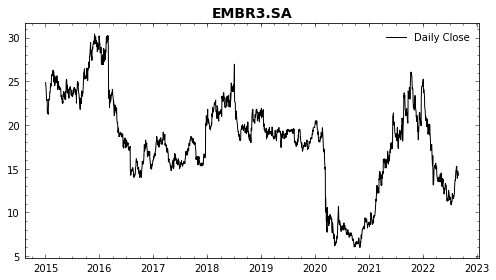

In [9]:
fig, ax = plt.subplots(figsize=(7,4))

ax.plot(df,label='Daily Close')
ax.set_title('EMBR3.SA')
plt.legend()

plt.tight_layout()
plt.show()

Se você já é usuário de `Python` talvez tenha notado que não precisamos indicar os valores `x` e `y` do gráfico. Como nosso `DataFrame` `df` contêm um único valor e o índice é uma sequência de datas, o `matplotlib` entende tratar-se de uma série temporal e emprega automaticamente o índice como `x` do gráfico e os valores da Série de dados como `y`. Essa é apenas uma das vantagens de empregarmos esse formato. 

> **No formato de um DataFrame com um índice `datetime` e um único campo de valor o `matplotlib` entende tratar-se de uma série temporal e emprega automaticamente o índice como `x` do gráfico e os valores da Série de dados como `y`.**



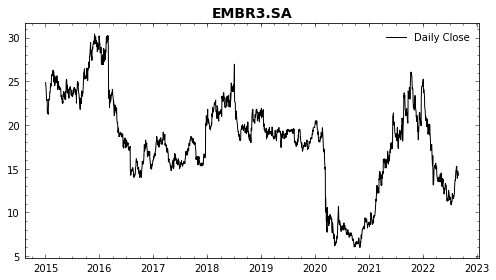

In [10]:
tspplot(ts=df,title='EMBR3.SA',label='Daily Close')

Empregaremos também uma função customizada do `plot()`, o `tspplot()`, para tornar o código mais simples e, novamente, você pode empregar a função padrão ou outra biblioteca de gráficos do `Python` sempre que quiser. 

## Manipulações de Séries Temporais
### `.diff() .shift() .cumsum()`

Existem algumas manipulações gerais de dados, como o tratamento de dados nulos ou a normalização de valores. Mas existem algumas manipulações de valores que são específicas e que só fazem sentido para Séries Temporais. 

A operação `.diff()` obtem a diferença entre um valor da série e o valor anterior, enquanto a funçao `.cumsum()` acumula no valor anterior (é operação inversa do `.diff()`). A operação `.shift(n)` faz a *defasagem* da série em $n$ intervalos de tempo.

In [11]:
df_diff = df.diff()
df_shift = df.shift()

df_diff_copy = df_diff.copy()
df_diff_copy.at[pd.to_datetime('2015-01-02'),'close'] = 24.85
df_cumsum = df_diff_copy.cumsum()

tspdisplay('df','df_diff','df_shift','df_cumsum')

,close
,
2015-01-02,24.850000
2015-01-05,24.299999
2015-01-06,23.860001
2015-01-07,23.680000
2015-01-08,23.000000
,close
,
2015-01-02,NaN
2015-01-05,-0.550001


Essas operações serão bastante úteis mais adiante. Por hora, você pode entender o uso dessas transformações quando, por exemplo, estamos interessados não no valor das ações da EMBR3.SA, mas nas diferenças das cotações diárias, isto é, se a o valor da ação subiu ou desceu com relação ao dia anterior. Isto é exatamente a função `diff()` e essa série é representada no gráfico a seguir (gráfico da direita). 

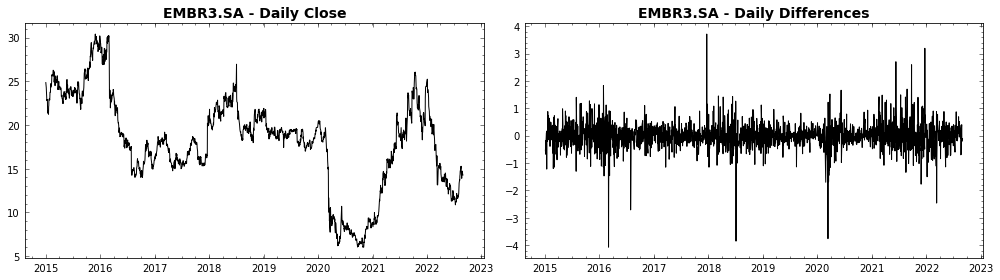

In [12]:
fig, ax = plt.subplots(1,2,figsize=(14,4))

tspplot(df,title='EMBR3.SA - Daily Close',ax=ax[0])
tspplot(df.diff(),title='EMBR3.SA - Daily Differences',ax=ax[1])


## Reamostragem
### `.resample()`

Outra transformação útil e que só faz sentido para Séries Temporais é reamostrar os dados com uma frequencia diferente das amostras. Por exemplo, podemos reamostar nossa Série de dados dários da EMBR3.SA, para valores mensais da Série. 

,close
,
2015-01-31,22.755238
2015-02-28,25.252778
2015-03-31,24.970909
2015-04-30,23.600000
2015-05-31,23.789000


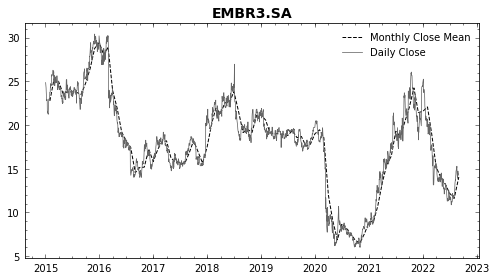

In [13]:
df_monthly = df.resample('M').mean()

fig, ax = plt.subplots()

tspplot(df_monthly,label='Monthly Close Mean',linestyle='dashed',lw=1,ax=ax)
tspplot(df,title='EMBR3.SA',label='Daily Close',ax=ax,alpha=0.1,lw=0.75)

tspdisplay('df_monthly')

Igualmente podemos reamostra para vlores semanais, trimestrais ou anuais, assim como séries com frequecia de minutos podem ser reamostradas em horas ou dias. Aqui empregamos o valor médio do mês para a reamostragem, mas também poderíamos igualmente ter empregado o máximo, o mínimo ou a mediana.

## Médias Móveis
### `rolling(n)`
A ideia de médias móveis é obter uma *suavização* dos dados empregando um valor que é a média de uma *janela móvel* ao longo do tempo. Você aprenderá essa técnica em detalhe no próximo capítulo. Por hora basta você entender que, por exemplo, se você tem dados diários, você pode criar uma média móvel de 7d em que o primeiro valor é a média dos 7 primeiros dias, $avg[1:7]$, o próximo valor é média do segundo dia até o 8o dia, $avg[2:8]$, e assim sucessivamente, $avg[3:9]$, $avg[4:10]$, sempre em uma *janela* de tempo de 7 dias.

A seguir a série de dados da EMBR3.SA com média móvel trimestral e o gráfico com as médias móveis de 3 e 12 meses. 



,close
,
2015-01-31,NaN
2015-02-28,NaN
2015-03-31,24.326308
2015-04-30,24.607896
2015-05-31,24.119970


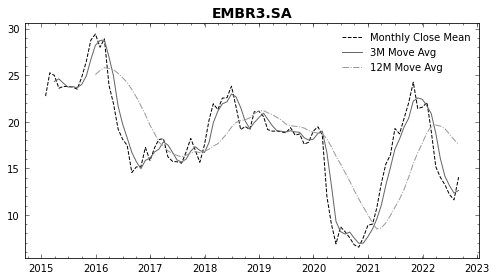

In [14]:
fig, ax = plt.subplots()

tspplot(df_monthly,label='Monthly Close Mean',linestyle='dashed',ax=ax)
tspplot(df_monthly.rolling(3).mean(),title='EMBR3.SA',label='3M Move Avg',ax=ax,alpha=0.5)
tspplot(df_monthly.rolling(12).mean(),title='EMBR3.SA',label='12M Move Avg',linestyle='dashdot',ax=ax,alpha=0.5)

tspdisplay('df_monthly.rolling(3).mean()')

## Decomposição
### `seasonal_decompose()`, `tspdecompose()`
Um aspecto importante na anális de Séries Temporais é a sua decomposição. Existem 3 componentes principais, a tendência, a sazonalidade e os resíduos. Como você verá mais adiante, boa parte deste capítulo trata exatamente sobre essa decomposição. Para obter as componentes de uma Série Temporal vamos empregar a biblioteca `statsmodel`. Essa biblioteca traz uma série de funções estatísticas e modelos de séries temporais, e vamos empregar muito ela nos capítulos seguintes. A função  `seasonal_decompose()` permite facilmente observar as componentes de uam Série de dados e, do mesmo modo que antes, muitas vezes vamos empregar nosso função customizada para isso `tspdecompose()`.

In [15]:
def tspdecompose(df,model='additive',title=None):
  from statsmodels.tsa.seasonal import seasonal_decompose

  decomp = seasonal_decompose(df, model='multiplicative')

  fig = decomp.plot()
  fig.set_size_inches((9, 7))

  if title is not None:
    plt.suptitle(title,y=1.05)

  plt.tight_layout()
  plt.show()

  return

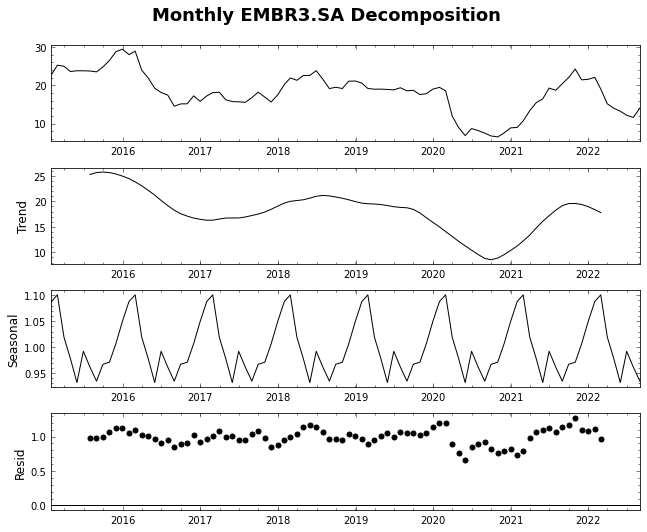

In [16]:
tspdecompose(df_monthly,title='Monthly EMBR3.SA Decomposition')

## Previsões 

Ao trabalharmos com uma Série Temporal nosso maior objetivo aqui é entender o seu comportamento e fazer previsões confiáveis sobre essa Série. É evidente a importância disso no nosso exemplo das ações da EMBR3.SA. 

Existem muitas bibliotecas e modelos que podem ser empregados para fazermos previsões de Séries Temporais. A biblioteca que mais empregaremos é a `statsmodels` que você já viu aqui antes. Mas a seguir empregamos a biblioteca `Kats` (*a **k**it to **a**nalyze **t**ime **s**eries*) e o modelo `Prophet` (da empresa Meta) previsões da ação da EMBR3.SA para os próximos 24 meses, sem a pretenção aqui de apresentar uma previsão correta desses valores. Aqui estamos apenas aplicando o código sem qualquer análise sobre que dados empregar, que ajustes são necessários no modelo etc. o que seria necessário para uma previsão útil. 

Nosso objetivo é apenas o de mostrar onde vamos chegar. Para você entender que bastam poucas linhas de código para você ter ferramentas bastante úteis e poderosas para analisar e fazer predições de Séries Temporais. Entender os fundamentos desses modelos e como criar e  aplicar códigos como este para fazer previsões é o objetivo deste livro.


In [17]:
%%capture
!pip install kats

In [18]:
from kats.models.prophet import ProphetModel, ProphetParams
from kats.consts import TimeSeriesData, TimeSeriesIterator
from kats.detectors.cusum_detection import CUSUMDetector
  
def kats_prophet(df,steps_ahead=30,freq="MS",model='additive'):

  ts = TimeSeriesData(df)

  # import the param and model classes for Prophet model
  from kats.models.prophet import ProphetModel, ProphetParams

  # create a model param instance
  params = ProphetParams(seasonality_mode=model) # additive mode gives worse results

  # create a prophet model instance
  m = ProphetModel(ts, params)

  # fit model simply by calling m.fit()
  m.fit()

  # make prediction for next steps_ahead months
  pred = m.predict(steps=steps_ahead, freq=freq)

  return m, pred



INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,fcst,fcst_lower,fcst_upper
time,,,
2022-09-01,13.286704,7.952296,18.699625
2022-10-01,14.042802,8.547310,19.517834
2022-11-01,13.650514,8.506238,18.629030
2022-12-01,12.738594,7.532783,18.510855
2023-01-01,11.162084,5.539355,16.738243


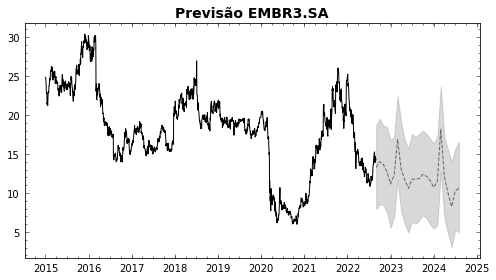

In [19]:
df_kats = df_monthly.reset_index()
df_kats.columns = ['time','close']

m, pred = kats_prophet(df_kats,model='multiplicative',steps_ahead=24)
pred = pred.set_index('time')

fig, ax = plt.subplots()
tspplot(df,ax=ax) 
tspplot(pred['fcst'],title='Previsão EMBR3.SA',linestyle='dashed',ax=ax) 
ax.fill_between(pred.index, pred['fcst_lower'], pred['fcst_upper'], color='grey', alpha=.3)

tspdisplay('pred')

Esse guia rápido traz uma série de ferramentas úteis para manipular e analisar Séries Temporais. Elas serão empregadas ao longo de todo o livro e empregaremos já algumas delas neste capítulo. Será útil você voltar neste *Quick Start* quando precisar apresentarmos essas operações. 

> **Daqui ao final do capítulo vamos nos concentrar mais nos conceitos e fundamentos que são necessários para você entender e empregar as ferramentas de análise e previsões de Séries Temporais. Diferente dos capítulos seguintes deste livro, muitos códigos aqui nesta introdução são empregados para apresentar um conceito. Esses conceitos muitas vezes já estarão automatizados nas funções das bibliotecas empregadas e, portanto, não haverá interesse em você se deter muito sobre eles. Alguns códigos estarão mesmo até omitidos, e se tiver interesse você pode encontrá-los no site do livro [*tsp book site*](https://github.com/Rogerio-mack/Temporal).**

# Séries Temporais

> **Uma *Série Temporal* é uma sequência de observações registradas em intervalos de tempo regulares.**

Essas observações são *medidas* tomadas ou encontradas a tempos regulares. Você certamente já encontrou dados como: 

* Os valores anuais do PIB
* Os preços diários de ações e commodities 
* Volume horário de transações de cartões crédito
* Faturamento ou volume vendas mensal de um negócio 
* Quantidade de *hits* diários em página Web ou site
* A quantidade de emissões de CO2 ou o aumento de temperatura anuais no mundo

Todos esses são dados muito comuns medidos a intervalos regulares, hora a hora, diários, mensais etc. podendo haver séries ainda com intervalos muito curtos, de segundos ou milisegundos, como algumas séries encontradas na física e na biomedicina, ou séries com intervalos muito longos, de décadas  ou  mais, encontradas na astronomia e geologia. Aqui você encontrará a maior parte dos exemplos empregando as séries mais comuns, como séries diárias a mensais, mas os procedimentos que você encontrará podem ser igualmente aplicados a qualquer série.






 



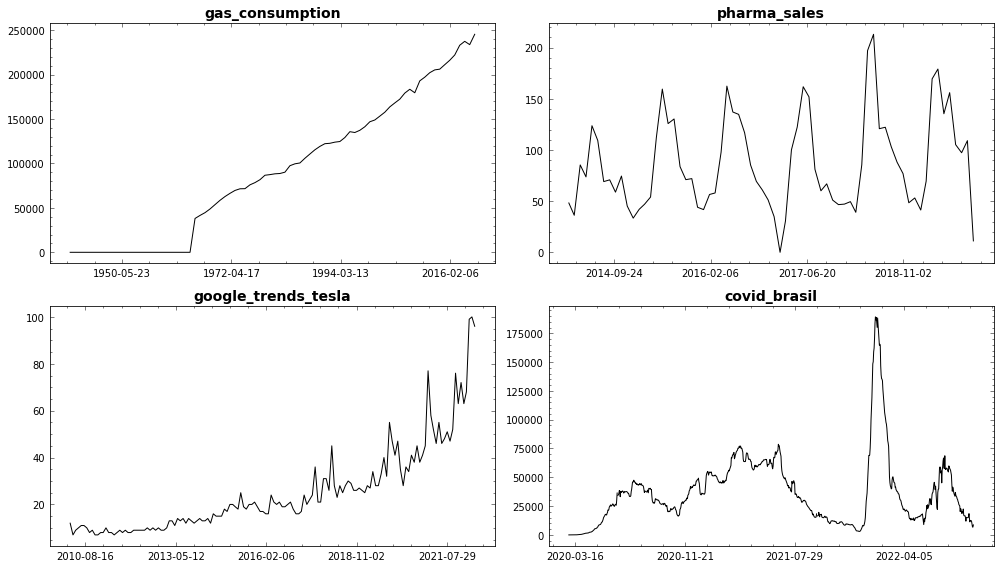

In [20]:
#@markdown  
datasets = pd.read_csv(path + 'datasets.csv', index_col=0) 

fig, ax = plt.subplots(2,2,figsize=(14,8))

show_files = ['gas_consumption.csv', 'pharma_sales.csv', 'google_trends_tesla.csv', 'covid_brasil.csv' ]

for i, axis in enumerate(fig.axes):
  df = pd.read_csv(path + show_files[i],index_col=0,parse_dates=True)
  tspplot(df[ df.columns[0] ],title=show_files[i].split('.csv')[0],ax=axis,nr_xticks=5)



**Figura 1. Exemplos de Séries Temporais. Gas Consumption: Evolução do Consumo de Gás para a geração de energia elétrica no mundo; Pharma Sales:  Volume de Venda Mensal de Anti-Histamínicos para uso Sistêmico; Google Trends Tesla:  Google Trends, quantidade de buscas normalizadas da palavra chave Tesla no Google; Covid Brasil:  Número ajustado de novos casos de COVID no Brasil.**

In [21]:
#@markdown Descrição
for fname in show_files:
  print(datasets[ datasets.file_name == fname ]['name'].values[0] + ':  ' +
          datasets[ datasets.file_name == fname ]['short_description'].values[0])

Gas Consumption:  Evolução do Consumo de Gás para a geração de energia elétrica no mundo
Pharma Sales:  Volume de Venda Mensal de Anti-Histamínicos para uso Sistêmico
Google Trends Tesla:  Google Trends, quantidade de buscas normalizadas da palavra chave Tesla no Google
Covid Brasil:  Número ajustado de novos casos de COVID no Brasil


Diferentes tarefas podem ser aplicadas a uma Série Temporal e de acordo com o seu objetivo você pode estar interessado em:

1. Fazer previsões de valores futuros
1. Entender o mecanismo gerador da Série
1. Descrever o comportamento da Série 
1. Procurar periodicidades relevantes
1. Identificar Anomalias
1. Simular a Série de Dados

Certamente, fazer previsões de valores futuros é o mais comum e neste livro nos deteremos principalemente nos conceitos e ferramentas para esta tarefa. Nessas tarefas, é importante dizer, existem várias abordagens que podemos empregar. 

Em todos os casos a ideia é criar um *modelo probabilístico* da série. Um modelo é sempre uma simplificação útil e esses *modelos probabilísticos* permitem simplificar a série real de dados para que você possa melhor analisá-la. Neste livro trataremos unicamente de modelos que são baseados no *domínio do tempo*, como o modelo ARIMA, e que são em geral mais empregados. Empregar o *domínio do tempo* significa que modelamos os valores da séries em função da *variável* tempo. Outros modelos, como a Análise de Fourier e Análise Espectral, empregam o *domínio da frequência* para modelar séries de dados, e há ainda modelos de *Espaço de Estados*, dentre outros. Modelos no domínio do tempo são *modelos paramétricos* pois são empregados um número finitos de parâmetros. Modelos no *domínio da frequência* são modelos *não paramétricos* e encontram maior aplicação em campos como a física e a astronomia. Por último, vamos nos limitar a modelos que empregam unicamente procedimentos estatísticos sobre os dados e que têm aplicação geral em qualquer campo, diferentemente de modelos que empregam uma *teoria* subjacente, como os modelos econômicos utilizados em  *econometria*. 



# Decomposição de Séries Temporais

A idea de construir um modelo é a de criarmos uma simplificação útil para os nossos propósitos. No caso de Séries Temporais o modelo de Decomposição de uma Série em séries mais simples é o procedimento clássico e o que adotaremos aqui.

Em geral decompomos uma série temporal em componentes onde cada componente busca modelar um tipo de padrão ou comportamento da série. Na maior parte das vêzes você pode encontrar esses componentes em uma série de dados:

* **Tendência**
* **Sazonalidade**
* **Resíduos**

A **tendência** representa o comportamento da série no longo prazo, o aumento ou diminuição de longo prazo nos dados o que pode se dar de forma linear ou não, como o crescimento da temperatura global ano a ano. A componente **sazonalidade** representa o padrão sazonal da série como mundanças que ocorrem com alguma periodicidade ao longo do tempo. É o caso dos acréscimos e decréscimos de temperatura que ocorrem ao longo das estações do ano, independentemente da elevação das temperaturas ao longo prazo. Por último, os **resíduos** constituem uma parte sobra das mudanças e que não podemos explicar. É a componente estocástica (de modo informal, *aleatória*) dos dados. Eles explicam, por exemplo, às diferenças de temperatura entre dois dias consecutivos da mesma estação causadas por inúmeros fatores que podem ir da maior presença de nuvens e raios solares, ao período do ciclo lunar naqueles dias. Você também pode encontrar essa componente sendo denominada de *erro aleatório* ou ainda *ruído branco*. 

Em geralmente combinamos a tendência a uma outra componente das séries que denominamos **ciclo** e que por simplicidade denominamos unicamente de  tendência. 

> **Sazonalidade $\times$ Ciclos. Ciclos e mudanças sazonais são comportamentos bem diferentes nas séries temporais. A sazonalidade é um comportamento recorrente que se repete a intervalos fixos, regulares (a maior temperatura em certas estações do ano, o maior número de visitas em um site de entretenimento aos finais de semana). Já os ciclos são comportamentos recorrentes mas que ocorrem a intervalos não regulares. Vulcões e terremotos, por exemplo, têm um comportamento recorrente, mas não sabemos quando irão ocorrer, e uma série que represente as temperaturas ou o tremor em torno da cratera do Vulcão [Eyjafjallajökull](https://pt.wikipedia.org/wiki/Eyjafjallaj%C3%B6kull) apresentará comportamentos repetivos, mas que não são sazonais (com periodicidade regular). O mesmo ocorre com as crises econômicas. Elas impõem ciclos econômicos que alternam recessão e crescimento, mas não sabemos quando irá ocorrer a próxima crise do petróleo ou próximo estouro da *bolha* de um determinado setor.** 

Você mesmo pode pensar em vários exemplos de cada um desses comportamentos. Esses comportamentos não aparecem todos obrigatoriamente em todas as séries. Uma série temporal pode apresentar uma certa tendência, mas não apresentar qualquer comportamento sazonal. 



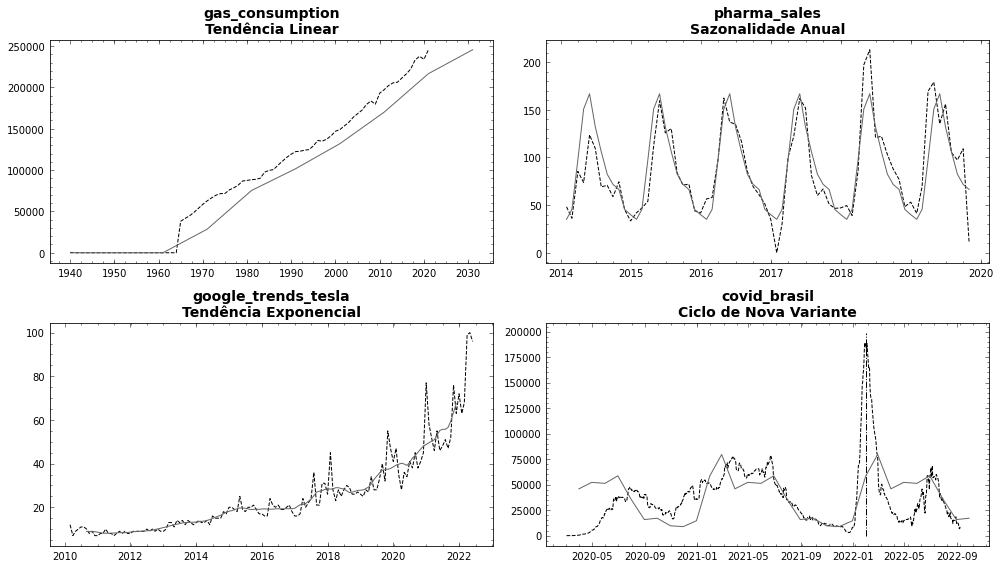

In [22]:
##@markdown  
from statsmodels.tsa.seasonal import seasonal_decompose

fig, ax = plt.subplots(2,2,figsize=(14,8))

show_files = ['gas_consumption.csv', 'pharma_sales.csv', 'google_trends_tesla.csv', 'covid_brasil.csv' ]

i = 0
df = pd.read_csv(path + show_files[i],index_col=0,parse_dates=True)
decomp = seasonal_decompose(df)

tspplot(df[[ df.columns[0] ]], ax=fig.axes[i], linestyle='dashed')
tspplot(decomp.trend.resample('10Y').mean(), title=show_files[i].split('.csv')[0] + '\nTendência Linear', ax=fig.axes[i])

i = 1
df = pd.read_csv(path + show_files[i],index_col=0,parse_dates=True)
decomp = seasonal_decompose(df)

tspplot(df[ df.columns[0] ], ax=fig.axes[i], linestyle='dashed')
tspplot(decomp.seasonal + df[ df.columns[0] ].mean(), title=show_files[i].split('.csv')[0] + '\nSazonalidade Anual', ax=fig.axes[i])

i = 2
df = pd.read_csv(path + show_files[i],index_col=0,parse_dates=True)
df.drop(columns='isPartial',inplace=True)
decomp = seasonal_decompose(df)

tspplot(df[ df.columns[0] ], ax=fig.axes[i], linestyle='dashed')
tspplot(decomp.trend, title=show_files[i].split('.csv')[0] + '\nTendência Exponencial', ax=fig.axes[i])

# fig.axes[i].xaxis.set_major_locator(ticker.MaxNLocator(5))

i = 3
df = pd.read_csv(path + show_files[i],index_col=0,parse_dates=True)
df2 = df.dropna()
df2 = df2.resample('M').mean()
df2.index = pd.to_datetime(df2.index)
decomp = seasonal_decompose(df2)

from datetime import datetime as dt
df2 = df2[df2.index >= dt.strptime('1940', '%Y')]

tspplot(df[[ df.columns[0] ]], ax=fig.axes[i], linestyle='dashed')
tspplot(decomp.seasonal + df[ df.columns[0] ].mean(), title=show_files[i].split('.csv')[0] + '\nCiclo de Nova Variante', ax=fig.axes[i])
plt.vlines(dt.strptime('2022-02-01', '%Y-%m-%d'), 0, 199000,linestyle='dashdot',label='Início variante')

plt.tight_layout()
plt.show()

**Figura 2. Tendência, Sazonalidade e Ciclos. Nas Séries do exemplo anterior você pode observar algumas dessas componentes.  Gas Consumption: apresenta uma tendência bastante linear; Pharma Sales:  não há uma tendência de crescimento ou decréscimo, mas há um padrão recorrente de evolução dos dados que se repete anualmente; Google Trends Tesla: também apresenta sazonalidade mas descatamos no gráfico a tendência exponencial das buscas; Covid Brasil: aqui você encontrar a componente sazonal, mas também destacamos o início de um novo ciclo da doença com o surgimento da variante Omicron do vírus Covid-19.**

A função a seguir emprega o pacote `statsmodel` e nossa função `tspdecompose()` (a função `seasonal_decompose()` customizada que você encontra no *Quick Start*)  para decompor uma série em suas componentes de tendência, sazonalidade e resíduos e você pode observar os resultados abaixo para a série exemplo de dados do Google Trends para a busca do termo 'Tesla'. Mas você não precisa se preocupar com esse código agora. 

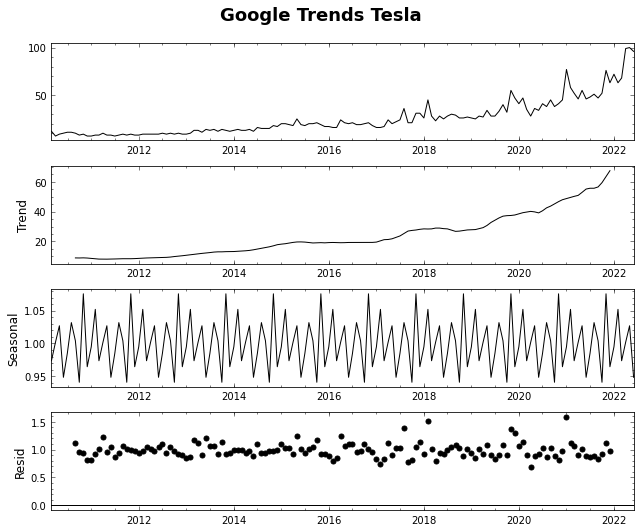

In [23]:
df = pd.read_csv(path + 'google_trends_tesla.csv', index_col=0,parse_dates=True)
df.drop(columns='isPartial',inplace=True)

tspdecompose(df, title='Google Trends Tesla', model='multiplicative')




## Séries Temporais Aditivas e Multiplicativas

Dependendo da natureza da série as componentes de tendência, sazonalidade e resíduos podem ser combinadas de duas formas: 

$$\text{Série Aditiva} = \text{Tendência +  Sazonalidade + Resíduos}$$

$$\text{Série Multiplicativa} = \text{Tendência} \times  \text{Sazonalidade} \times \text{Resíduos}$$

Ou, seguindo a notação que empregaremos daqui em diante:

$$ Y_t = T_t + S_t + R_t $$

para modelos aditivos, e:

$$ Y_t = T_t \times S_t \times R_t $$

para modelos multiplicativos.

> **Lembre-se que estamos criando modelos e os modelos são sempre simplificações, hipóteses que fazemos, mas que serão úteis a análise e previsões das séries temporais. Ninguém informou aos usuários do Google que suas tendências e sazonalidades de buscas precisam ser somadas ou multiplicadas, e nem mesmo precisa haver uma forma de combinar essas componentes. Mas observamos que a multiplicação *funciona* e aproxima melhor a série, sendo portanto útil para nossos propósitos. Essa é a ideia de empregarmos modelos.**

# Construindo uma Série Temporal

A simulação de séries temporais tem um papel importante em muitas aplicações no campo das engenharias, da física e séries climáticas. Mas aqui o nosso propósito é mais modesto e trata-se apenas de fornecer uma ferramenta para você construir e explorar diferentes séries de dados e suas decomposições.

Uma forma comum de se pensar a componente tendência é aplicar uma função linear ou polinomial de grau maior, mas também são empregadas funções exponenciais e equações de diferenças. Já para a componente sazonal, funções periódicas como $sin$ ou $cos$, ou ainda funções *dummy* (que atribuem um valor para cada um dos perídos do ciclo), são geralmente empregadas. Assim, se você considerar um modelo aditivo,

$$ Y_t = T_t + S_t + R_t $$

E pensar, dentre outros modelos possíveis, em modelo como: 

$$ Y_t = (\beta_0 + \beta_1 t + \beta_2 t^2 + \beta_3 t^3)\space \space \space + \alpha (\frac{ 2 \pi }{ k } \sin t) \space \space \space + \text{noise} $$

onde $(\beta_0 + \beta_1 t + \beta_2 t^2 + \beta_3 t^3)$  corresponde a componente $T_t$, e empregamos $\alpha (\frac{ 2 \pi }{ k } \sin t )$ como a componente $S_t$, embora polinômios de grau maior e funções periódicas mais complexas possam ser empregadas. 

Esse modelo é implementado a seguir. Ele permite você criar séries de dados mensais, aditivas e multiplicativas, com diferentes periodicidades. O parâmetros `beta_`$n$ fornecem os coeficientes do polinômio de grau 3 e `seasons_month_len` ($k$) permite modelar o tamanho em meses do período sazonal. O parâmetro $\alpha$ fornece uma escala para a componente sazonal em termos de um percentual dos valores de tendência. O ruído é um valor aleatório com distribuição normal. 






Como antes, você não precisa dar atenção a este código agora. Além disso sua implementação explora recursos de interatividade que podem não lhe interessar. Mas você precisa apenas executar a função `simulate_ts1` para verificar e explorar diferentes séries de dados e suas decomposições.  

In [24]:
#@markdown `tspsimulate()`
import ipywidgets as widgets
from statsmodels.tsa.seasonal import seasonal_decompose

def tspsimulate(nr_months=60, beta_0=1, beta_1=2, beta_2=0, beta_3=0, alpha=0.2, seasons_month_len=10, noise=0.2, model='additive', show_plot=False, title='TS Sample'):
  np.seed = 123
  index_dates = pd.date_range(start='1/1/2000', periods=nr_months, freq='M')

  t = np.arange(0,len(index_dates),1)
  n = len(t)

  T = beta_0 + beta_1*t + + beta_2*t**2 + beta_3*t**3
  S = np.sin( np.arange(0,len(index_dates),1) * 2 * np.pi/seasons_month_len)
  S = S # only positives values
  S = S * T.mean() * alpha # scale
  R = np.random.sample(n) 
  R = R # only positives values
  R = R * T.mean() * noise # scale

  if model == 'additive':
    Y = T + S + R  
  else:
    Y = T * S * R  
  
  Y = Y + np.abs(Y.min()) + 1 # just to create only positive values

  df = pd.DataFrame()
  df.index = index_dates
  df['t'], df['Y'], df['T'], df['S'], df['R'] = t, Y, T, S, R 

  global ts1
  ts1 = df

  decomp = seasonal_decompose(df.Y, model=model, period=seasons_month_len)

  if show_plot:
    fig = decomp.plot()
    fig.set_size_inches((9, 7))

    if title is not None:
      plt.suptitle(title,y=1.05)

    plt.tight_layout()
    plt.show()

  # plt.plot(df['T'])
  # plt.show()

  # plt.plot(df['S'])
  # plt.show()

  return ts1 

tspsimulate_ts = widgets.interactive(tspsimulate,  alpha=(0.2,10), beta_0=(-10,10), beta_1=(-10,10), beta_2=(-10,10), beta_3=(-10,10) ,nr_months=(40,120,1), seasons_month_len=(3, 12, 3), noise=(0, 1, 0.01), model=['additive','multiplicative'], show_plot=True)



In [25]:
tspsimulate_ts

interactive(children=(IntSlider(value=60, description='nr_months', max=120, min=40), IntSlider(value=1, descri…

A função também retorna um dataframe `ts1` com os valores de cada componente produzidos.

In [26]:
ts1.head()

,t,Y,T,S,R
2000-01-31,0,13.084577,1,0.000000,5.061469
2000-02-29,1,28.224188,3,7.053423,11.147657
2000-03-31,2,26.918919,5,11.412678,3.483133
2000-04-30,3,26.480929,7,11.412678,1.045142
2000-05-31,4,30.164861,9,7.053423,7.088330


Como você pode notar experimentando o programa acima ou ainda observando as séries produzidas abaixo com diferentes parâmetros, nosso modelo, embora simples, e parece ser útil para simular uma boa quantidade de diferentes séries de dados. Por isso é que empregamos modelos como esses. Mesmo simples, eles podem modelar uma grande variedade de fenômenos temporais e a maior parte dos modelos consiste em variações do modelo aqui apresentado.

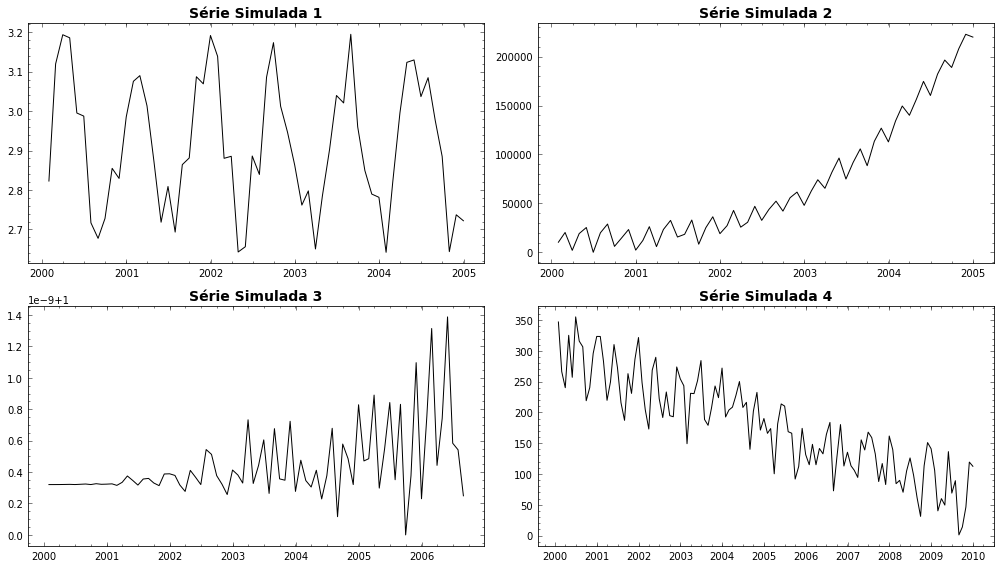

In [27]:
df1 = tspsimulate(nr_months=60, beta_1=0, seasons_month_len=10, noise=0.2, model='additive', show_plot=False)
df2 = tspsimulate(nr_months=60, beta_1=-1, beta_2=2, beta_3=1, seasons_month_len=3, noise=0.2, model='additive', show_plot=False)
df3 = tspsimulate(nr_months=80, beta_1=-2, alpha=0.2, seasons_month_len=1, noise=0.2, model='multiplicative', show_plot=False)
df4 = tspsimulate(nr_months=120, beta_1=-2, seasons_month_len=6, noise=0.9, model='additive', show_plot=False)

fig, ax = plt.subplots(2,2,figsize=(14,8))

tspplot(df1[['Y']],title='Série Simulada 1',ax=ax[0,0])
tspplot(df2[['Y']],title='Série Simulada 2',ax=ax[0,1])
tspplot(df3[['Y']],title='Série Simulada 3',ax=ax[1,0])
tspplot(df4[['Y']],title='Série Simulada 4',ax=ax[1,1])

# Estacionariedade  

Decompor uma série já nos traz informações bastante úteis como a expectativa de seus valores futuros e incerteza, ou seus padrões sazonais. Mas na maior parte dos casos estamos interessados em fazer previsões de valores futuros. Para isso, a maior parte dos modelos assume que a série utilizada para previsão é uma *estacionária*. 

> **Uma série estacionária é uma série cujos os valores evoluem no tempo em torno de uma média constante. O problema é que a maior parte das séries não é estacionária!**

Isso significa que as estatísticas, como a média, a mediana e a variância dos seus valores da série mudam significativamente ao longo. O problema é que a maior parte das séries não é estacionária pois apresenta algum tipo de tendência (ou ciclo).  





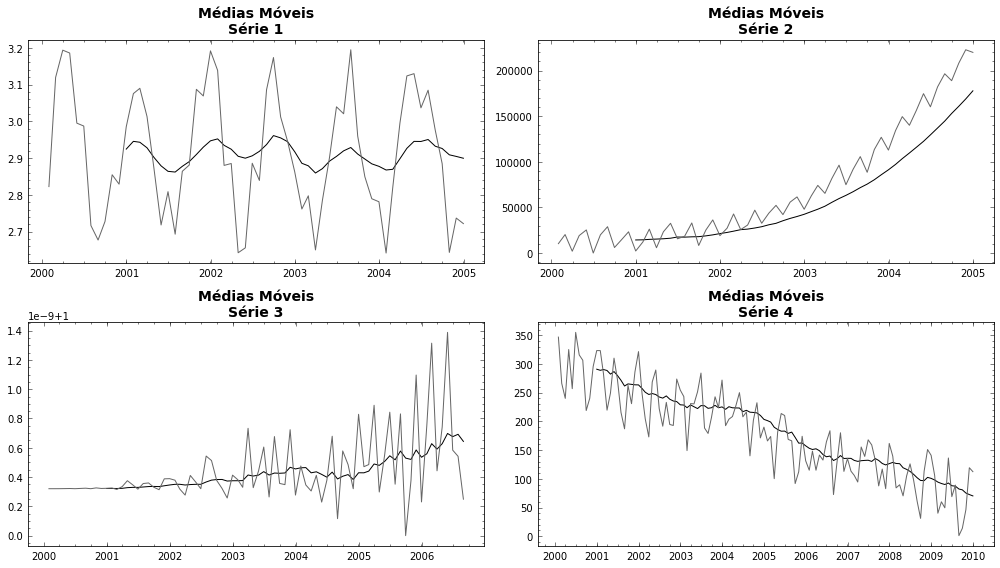

In [28]:
fig, ax = plt.subplots(2,2,figsize=(14,8))

tspplot(df1.rolling(12).mean().Y ,title='Médias Móveis\nSérie 1', ax=ax[0,0])
tspplot(df1.Y , ax=ax[0,0])

tspplot(df2.rolling(12).mean().Y ,title='Médias Móveis\nSérie 2', ax=ax[0,1])
tspplot(df2.Y , ax=ax[0,1])

tspplot(df3.rolling(12).mean().Y ,title='Médias Móveis\nSérie 3', ax=ax[1,0])
tspplot(df3.Y , ax=ax[1,0])

tspplot(df4.rolling(12).mean().Y ,title='Médias Móveis\nSérie 4', ax=ax[1,1])
tspplot(df4.Y , ax=ax[1,1])




Por exemplo, das séries anteriores, apenas a Série Simulada 1 apresenta uma média dos valores a intervalos de 12 meses (*média móvel*) dentro de um intervalo pequeno de $[1.0, 1.14]$. De fato, você pode observar que essa é a única série produzida com a componente tendência igual a uma constante. Todas as demais apresentam a médias móveis de 12 meses com valores crescentes ou decrescentes.  E se você ainda tiver dúvidas sobre a Série Simulada 3, pode observar também o desvio padrão ao longo do tempo das séries ao longo do tempo. Aqui empregamos valores normalizados (normalizados entre $[0,1]$) do desvio padrão. 

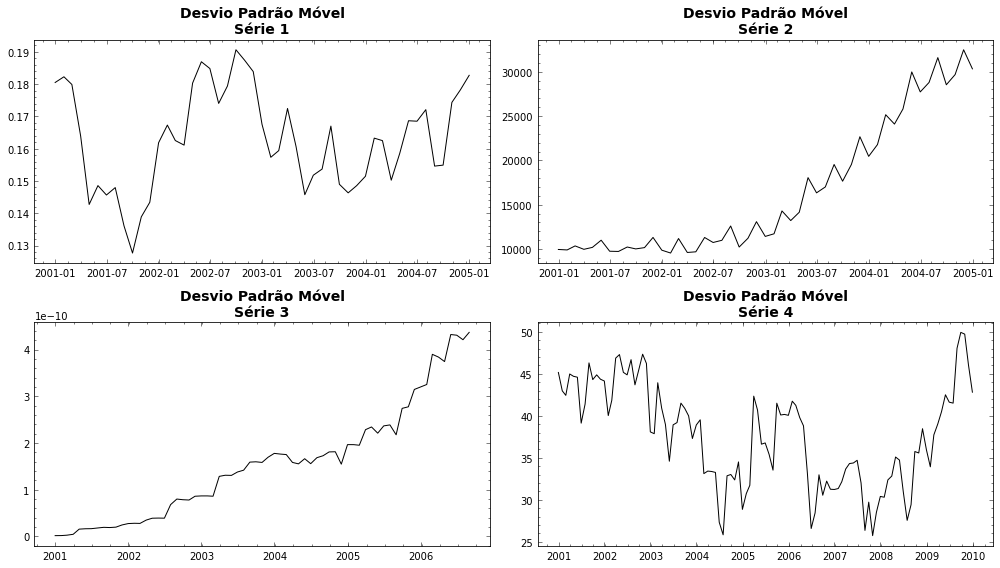

In [29]:
fig, ax = plt.subplots(2,2,figsize=(14,8))

tspplot(df1.rolling(12).std().Y ,title='Desvio Padrão Móvel\nSérie 1', ax=ax[0,0])
tspplot(df2.rolling(12).std().Y ,title='Desvio Padrão Móvel\nSérie 2', ax=ax[0,1])
tspplot(df3.rolling(12).std().Y ,title='Desvio Padrão Móvel\nSérie 3', ax=ax[1,0])
tspplot(df4.rolling(12).std().Y ,title='Desvio Padrão Móvel\nSérie 4', ax=ax[1,1])




Das séries do começo do nosso capítulo somente a série pharma_sales parece suficientemente estacionária. 

Assim, o procedimento geral consiste em fazermos *transformações* na série original (não estacionária) para obtermos uma série estacionária *derivada* a qual poderemos empregar para previsões e, então, voltarmos à série original. Em geral nos referimos a esse procedimento como *tornar a série estacionária*, embora, é claro, trata-se de criar um nova série derivada. Nesse procedimento a a decomposição de séries tem um papel fundamental. 



# Tendências e Transformações

Duas transformações são particularmente úteis e geralmente empregadas para tirar tendências das séries tornando-as estacionárias: aplicar diferenças e o $log$ dos valores da série. Mas vamos entender como e por que funcionam essas transformações. 



### Série de Diferenças

Uma série de diferenças consiste em criarmos a série de diferenças dos valores da série original. Por exemplo, para série:

$$ Y_t = [0, 2, 4, 6, 8, 10] $$ 

a série de diferenças de primeira ordem consiste em:

$$ \Delta Y_t = Y_t - Y_{t-1} = [na, 2, 2, 2, 2, 2] $$

Para a série 

$$ Y_t = [0, 2, 4, 8, 16, 32, ..., 2^n] $$ 

a série de diferenças de primeira ordem consiste em:

$$ \Delta Y_t = Y_t - Y_{t-1} = = [na, 0, 2, 4, 8, 16,  ..., 2^{n-1}] $$

e a segunda ordem consiste de fazermos novamente as diferenças da série resultante:

$$ \Delta^2 Y_t = \Delta Y_t - \Delta Y_{t-1} = [na, na, 0, 2, 4, 8,  ..., 2^{n-2}] $$

Em `Python` você pode empregar a função `diff()` do `Pandas` que vimos na seção de `Quick Start` para obter Séries de diferenças. 

In [30]:
df = pd.DataFrame(index=pd.date_range(start='1/1/2020', periods=12, freq='M'),
                  data={'values':np.arange(0,12)**2})

tspdisplay('df', 'df.diff()', 'df.diff().diff()')

,values
2020-01-31,0
2020-02-29,1
2020-03-31,4
2020-04-30,9
2020-05-31,16
,values
2020-01-31,NaN
2020-02-29,1.0
2020-03-31,3.0
2020-04-30,5.0


O que você pode notar é que podemos empregar essas diferenças para tornar uma série estacionária. Considere por exemplo uma série composta apenas de uma tendência linear:

$$ Y_t = \beta_0 + \beta_1 t $$

Ela não é certamente uma série estacionária pois sua média muda ao longo do tempo em uma taxa $\beta_1$. Agora, se tomamos a série de diferenças de $Y_t$:

$$ \Delta Y_t = Y_t -  Y_{t-1} $$
$$ = (\beta_0 + \beta_1 t) -  (\beta_0 + \beta_1 (t-1)) $$
$$ = \beta_1 $$

e, portanto, a série obtida é estacionária. 

Se tomamos agora a série de diferenças de $Y_t$:

$$ \Delta Y_t = Y_t -  Y_{t-1} $$
$$ = (\beta_0 + \beta_1 t) -  (\beta_0 + \beta_1 (t-1)) $$
$$ = \beta_1 $$

Assim, se tomamos a série $\Delta Y_t$: 

,Y,dY
2000-01-31,3.0,NaN
2000-02-29,5.0,2.0
2000-03-31,7.0,2.0
2000-04-30,9.0,2.0
2000-05-31,11.0,2.0


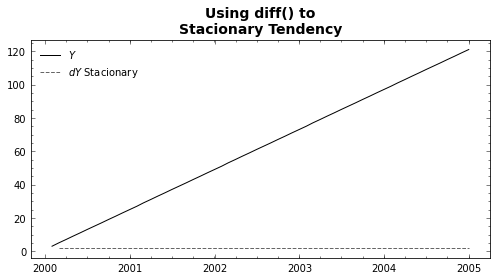

In [31]:
df = tspsimulate(beta_0=1, beta_1=2, noise=0, seasons_month_len=1)
df['dY'] = df['Y'].diff()

fig, ax = plt.subplots()
tspplot(df['Y'],title='Using diff() to\nStacionary Tendency',label='$Y$',ax=ax)
tspplot(df['dY'],label='$d Y$ Stacionary',linestyle='dashed',ax=ax)
tspdisplay("df[['Y','dY']]")

O mesmo vale para polinômios de ordem superior empregando-se diferenças de ordem maior. Se tomarmos a série:

$$ Y_t =  \beta_0 + \beta_1 t + \beta_2 t^2 $$

Podemos empregar uma série de diferenças de ordem 2:

$$ \Delta Y_t = Y_t -  Y_{t-1} $$
$$ = (\beta_0 + \beta_1 t +  \beta_2 t^2) -  (\beta_0 + \beta_1 (t-1)  + \beta_2 (t-1)^2) $$
$$ = \beta_1 - \beta_2 + 2 \beta_2 t $$

Como $\Delta Y_t$ é linear, sabemos que aplicando novamente a essa série de diferenças obteremos uma série de valor constante: 

$$ \Delta^2 Y_t = \Delta Y_t -  \Delta Y_{t-1} $$
$$ = (\beta_1 - \beta_2 + 2 \beta_2 t) - (\beta_1 - \beta_2 + 2 \beta_2 (t-1)) $$
$$ = 2 \beta_2 $$


In [32]:
#@markdown Se tiver interesse empregamos o SymPy para resolução dessas equações aqui. 
from sympy import *
from IPython.display import display, Math, Latex
Y_t, Y_t_1, dY_t, dY_t_1, d2Y_t, b_0, b_1, b_2, t = symbols('Y_t Y_t_1 dY_t dY_t_1 d2Y_t b_0 b_1 b_2 t')

Y_t = b_0 + b_1 * t + b_2 * t ** 2
Y_t_1 = b_0 + b_1 * (t-1) + b_2 * (t-1) ** 2
dY_t = expand(Y_t - Y_t_1)
display(Eq(S('dY_t'), dY_t ))

dY_t_1 = expand(b_1 + 2*b_2*(t-1) - b_2)
display(Eq(S('dY_t_1'), dY_t_1 ))

d2Y_t = expand(dY_t - dY_t_1)
display(Eq(S('d2Y_t'), d2Y_t))

Eq(dY_t, b_1 + 2*b_2*t - b_2)

Eq(dY_t_1, b_1 + 2*b_2*t - 3*b_2)

Eq(d2Y_t, 2*b_2)

,Y,dY,d2Y
2000-01-31,3.0,NaN,NaN
2000-02-29,8.0,5.0,NaN
2000-03-31,19.0,11.0,6.0
2000-04-30,36.0,17.0,6.0
2000-05-31,59.0,23.0,6.0


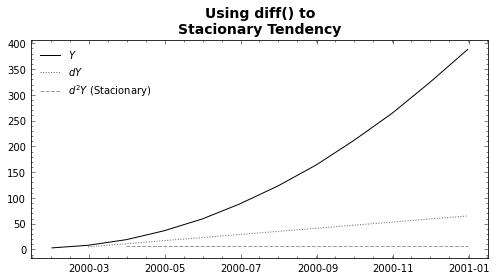

In [33]:
df = tspsimulate(beta_0=1, beta_1=2, beta_2=3, noise=0, seasons_month_len=1,nr_months=12)
df['dY'] = df['Y'].diff()
df['d2Y'] = df['Y'].diff().diff()

fig, ax = plt.subplots()
tspplot(df['Y'],title='Using diff() to\nStacionary Tendency',label='$Y$',ax=ax)
tspplot(df['dY'],label='$dY$',linestyle='dotted',ax=ax)
tspplot(df['d2Y'],label='$d^2Y$ (Stacionary)',linestyle='dashed',ax=ax)
tspdisplay("df[['Y','dY','d2Y']]")

Felizmente para a maior parte dos casos práticos, mesmo séries complexas como séries financeiras e econômicas, a aplicação de uma ou duas ordens de diferenças é suficiente para você obter a estacionariedade da série.



## Série do Logaritmo

Uma série de diferenças elimina uma tendência linear para séries aditivas e exponencial para séries multiplicativas, e séries de diferenças de ordem maior podem ser utilizadas para séries com tendência polinomial. Mas o que dizer das séries exponenciais como a maior parte das séries econômicas e de preços. Para isso podemos empregar a transformação logarítma da série antes de aplicarmos a diferenças.



Note que, se $Y_t$ tem apenas tendência exponencial ela é uma série da forma:

$$ Y_t = \beta_0 + \beta_1 ^ {t} $$

e portanto, 

$$ \ln Y_t = \ln \beta_0 ln \beta_1 ^ {t} $$
$$=\ln \beta_0 ln \beta_1  \times {t} = \beta_0' \times t $$

sendo a série $\ln Y_t$ linear ela pode ser tornada estacionária aplicando-se uma única transformação de diferenças.

$$ \Delta \ln Y_t = \beta_0' \times t $$

É por isso que no tratamento de várias séries econômicas e de preços aplicamos frequentemente a transformação logarítmica, o que se aplica não só para obtermos a estacionariedade de séries temporais mas também a outros problemas, como a aplicação de modelos de regressão linear. 

,Y,dY,d2Y,dlogY
2000-01-31,20.085537,NaN,NaN,NaN
2000-02-29,33.115452,13.029915,NaN,0.5
2000-03-31,54.598150,21.482698,8.452783,0.5
2000-04-30,90.017131,35.418981,13.936283,0.5
2000-05-31,148.413159,58.396028,22.977047,0.5


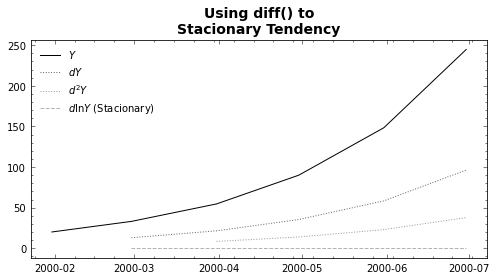

In [34]:
df = tspsimulate(beta_0=1, beta_1=0.5, noise=0, seasons_month_len=1,nr_months=6)
df['Y'] = np.exp(df['Y']) # adaptado para produzir uma série exponencial  
df['dY'] = df['Y'].diff()
df['d2Y'] = df['Y'].diff().diff()
df['dlogY'] = np.log( df['Y'] ).diff()

fig, ax = plt.subplots()
tspplot(df['Y'],title='Using diff() to\nStacionary Tendency',label='$Y$',ax=ax)
tspplot(df['dY'],label='$dY$',linestyle='dotted',ax=ax)
tspplot(df['d2Y'],label='$d^2Y$',linestyle='dotted',ax=ax)
tspplot(df['dlogY'],label='$d \ln Y$ (Stacionary)',linestyle='dashed',ax=ax)
tspdisplay("df[['Y','dY','d2Y','dlogY']]")

O gráfico acima mostra a limitação de empregarmos séries de diferenças para tornar uma série exponencial estacionária. Entretanto, a série se torna facilmente estacionária se empregarmos a diferença ao log dos valores.

## Aplicando as Transformações a Séries Reais

Podemos aplicar esse procedimentos a nossas séries exemplo do começo do capítulo. Como você pode ver as séries `gas_consumption` e `google_trends_tesla` não são estacionárias. Mas enquanto `gas_consumption` tem uma tendência linear, `google_trends_tesla` tem um comportamento exponencial. Desse modo aplicamos apenas a transformação de diferenças a  `gas_consumption`, enquanto para `google_trends_tesla` aplicamos a transformação $\ln$ para, na sequência, aplicarmos a diferença. Em ambos os casos é suficiente aplicarmos a diferença de ordem $1$ para obtermos a estacionariedade da Série. 

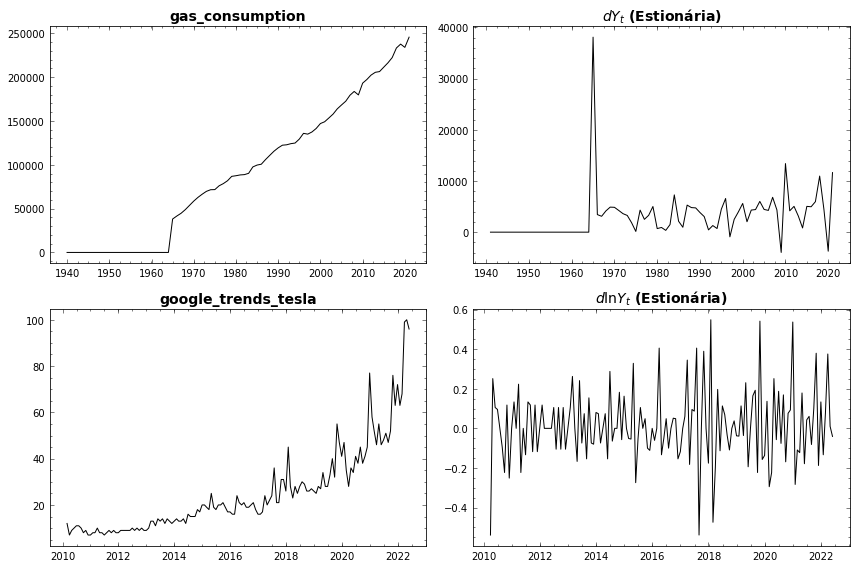

In [35]:
fig, ax = plt.subplots(2,2,figsize=(12,8))

fname = 'gas_consumption.csv'
df = pd.read_csv(path + fname,index_col=0,parse_dates=True)
tspplot(df['gas_consumption'], title=fname.split('.csv')[0], ax=ax[0,0])
tspplot(df['gas_consumption'].diff(), ax=ax[0,1], title='$d Y_t$ (Estionária)')

fname = 'google_trends_tesla.csv'
df = pd.read_csv(path + fname,index_col=0,parse_dates=True)
tspplot(df['Tesla'], title=fname.split('.csv')[0], ax=ax[1,0])
tspplot(np.log(df['Tesla']).diff(), ax=ax[1,1], title='$d \ln Y_t$ (Estionária)')


> **Note que na Série 'estacionária' produzida a partir de `gas_consumption` há um 'pico'. A série é estacionária? Na verdade, maior parte dos casos reais dificilmente você irá obter uma série 'totalmente estacionária'. Assim precisamos *relaxar* nossas condições e buscar uma série 'suficientemente estacionária', o que deverá servir para a maior parte dos propósitos.**  

## Fazendo Ajuste e Previsões das Séries

Você deve estar se perguntando: mas como essas transformações poderiam me ajudar a fazer previsões? 

Nós decompomos as séries em tedência, sazonalidade e resíduos, e nosso objetivo é de capturar os comportamentos de tendência e sazonalidade das séries para fazer previsões Lembre-se o resíduo é a componente aletória da série que não conseguimos capturar, uma parte não previsível. Nesta seção vamos apenas em capturar a tendência das séries e você poderá entender como empregamos as transformações anteriores para isso.  

Nós sempre assumimos que a série (e aqui estamos nos referindo unicamente á tendência) tem um certo comportamento, por exemplo, um comportamento linear ou exponencial:

$$ Y_t =  \beta_0 + \beta_1 t  $$

ou

$$ Y_t =  e^{\beta_0 + \beta_1 t}  $$, onde $e$ é base exponencial.

O que queremos é encontrar os valores dos coeficientes que melhor ajustam os dados da nossa série. As transformações anteriores podem ser empregadas para nos ajudar nisso. 




Em ambos os casos podemos empregar a série de diferenças $dY_t$ para obter uma média de seus valores e, portanto, uma estimativa para o coeficiente $\beta_1$. O valor de $\beta_0$ é um valor inicial da série. Obtemos então as estimativas:

$$ \hat{Y}_t =  \hat \beta_0 + \hat \beta_1 t   = Y_0 + \frac{1}{n} \sum dY_t t$$

ou, no caso exponencial:

$$ \hat{Y}_t =  e^{\hat \beta_0 + \hat \beta_1 t }  = e^{ \ln Y_0 + \frac{1}{n} \sum d \ln Y_t t}$$

Lembrando que, neste caso, empregamos a diferença do $\log$ da série original.

,Y_hat
2004-12-31,137.527548
2005-01-31,139.515448
2005-02-28,141.503349
2005-03-31,143.491249
2005-04-30,145.479149


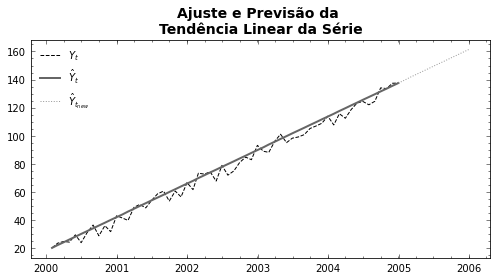

In [46]:
df = tspsimulate(beta_0=1, beta_1=2, seasons_month_len=1)

def forecast_linear(df, steps_ahead = 1, freq='M', title='Ajuste e Previsão da \nTendência Linear da Série'):
  df = df.copy()
  df.columns = ['Y']
  df['t'] = np.arange(0,len(df))

  df['dY'] = df['Y'].diff()
  df['Y_hat'] = df[df.t == 0]['Y'][0] + df['dY'].mean() * df['t']

  fig, ax = plt.subplots()
  tspplot(df['Y'], ax=ax, label='$Y_t$',linestyle='dashed')
  tspplot(df['Y_hat'], ax=ax, label='$\hat{Y}_t$',lw=2,alpha=0.5)

  forecast = pd.DataFrame()
  forecast['t'] = np.arange(len(df) - 1, len(df) + steps_ahead)
  forecast.index = pd.date_range(start=df[df.t == len(df) - 1].index[0].strftime('%Y-%m-%d'), periods=steps_ahead+1,freq=freq)
  forecast['Y_hat'] = df[df.t == 0]['Y'][0] + df['dY'].mean() * forecast['t']

  tspplot(forecast['Y_hat'], ax=ax, label='$\hat{Y}_{t_{new}}$',linestyle='dotted',title=title)

  return forecast 

forecast = forecast_linear(df[['Y']], steps_ahead = 12)
tspdisplay("forecast[['Y_hat']]")


,Y_hat
2000-12-31,799.127751
2001-01-31,1064.436515
2001-02-28,1417.827241


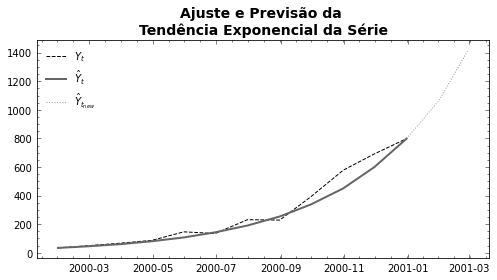

In [44]:
df = tspsimulate(beta_0=1, beta_1=0.3, seasons_month_len=1, nr_months=12)
df['Y'] = np.exp(df['Y']) # adaptado para produzir uma série exponencial 

def forecast_exponencial(df, steps_ahead = 1, freq='M', title='Ajuste e Previsão da \nTendência Exponencial da Série'):
  df = df.copy()
  df.columns = ['Y']
  df['t'] = np.arange(0,len(df))
  
  df['dY'] = np.log(df['Y']).diff()
  df['Y_hat'] = np.exp(np.log(df[df.t == 0]['Y'][0]) + df['dY'].mean() * df['t'])

  fig, ax = plt.subplots()
  tspplot(df['Y'], ax=ax, label='$Y_t$',linestyle='dashed')
  tspplot(df['Y_hat'], ax=ax, label='$\hat{Y}_t$',lw=2,alpha=0.5)

  forecast = pd.DataFrame()
  forecast['t'] = np.arange(len(df) - 1, len(df) + steps_ahead)
  forecast.index = pd.date_range(start=df[df.t == len(df) - 1].index[0].strftime('%Y-%m-%d'), periods=steps_ahead+1, freq=freq)
  forecast['Y_hat'] = np.exp(np.log(df[df.t == 0]['Y'][0]) + df['dY'].mean() * forecast['t'])

  tspplot(forecast['Y_hat'], ax=ax, label='$\hat{Y}_{t_{new}}$',linestyle='dotted',title=title)

  return forecast 

forecast = forecast_exponencial(df[['Y']], steps_ahead = 2)
tspdisplay("forecast[['Y_hat']]")


Esse mesmo procedimento, aplicado a nossas séries simuladas, pode ser aplicado para o ajuste e a previsão da tendência das nossas séries reais, por exemplo, `gas_consumption` e `google_trends_tesla`.

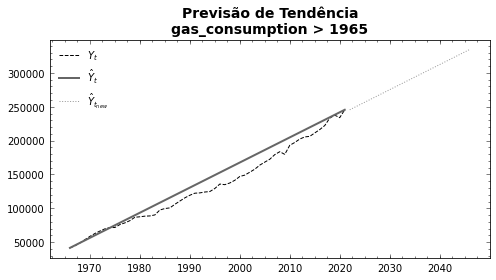

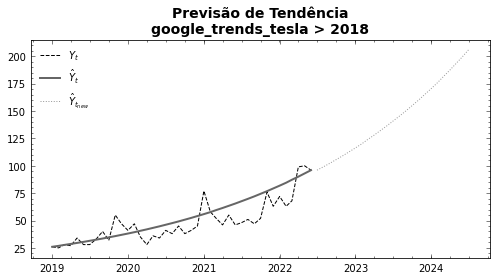

In [47]:
fname = 'gas_consumption.csv'
df = pd.read_csv(path + fname,index_col=0,parse_dates=True)

forecast = forecast_linear(df[ df.index.year > 1965 ][['gas_consumption']], 
                           steps_ahead = 24, 
                           freq='Y',
                           title='Previsão de Tendência\ngas_consumption > 1965')

fname = 'google_trends_tesla.csv'
df = pd.read_csv(path + fname,index_col=0,parse_dates=True)

forecast = forecast_exponencial(df[ df.index.year > 2018 ][['Tesla']], 
                                steps_ahead = 24, 
                                title='Previsão de Tendência\ngoogle_trends_tesla > 2018')
print()

Ao fazer a previsão, ou *forecasting*, para valores futuros da série, você pode observar a tendência e verificar, por exemplo, que dados mais antigos têm uma influência menor no comportamento mais recente da série. Lembre-se que as séries podem sofrer ciclos. Assim, uma previsão melhor, pode ser obtida fazendo-se um ajuste da série a um intervalo mais recente. Assim, nos exemplos anteriores, empregamos somente dados a partir de 1965 para `gas_consumption` para fazermos o ajuste e a previsão de novos casos, excluindo um período de estabilidade das décadas de 50 e 60 que não refletia o movimento mais recente da série. Para a série `google_trends_tesla` empregamos somente dados a partir de 2018, capturando o comportamento exponencial mais recente da série. 



Como você pode ver essas expressões *ajustam* bastante bem os valores já conhecidos da série e podem, então, ser empregados para a previsão de novos valores. 

Veja a seguir esse mesmo procedimento empregado nas séries reais `gas_consumption` e `google_trends_tesla`. Note que ainda estamos trabalhando com séries que não possuem sazonalidades, mas apenas um comportamento de tendência a ser capturado.



Os cálculos anteriores podem ser bastante mais complexos a depender do modelo empregado, mas o princípio de funcionamento é basicamente o mesmo: buscamos estimar os melhores parâmetros de um modelo aos nossos dados. Aqui, e na seção que segue sobre sazonalidade, empregamos métodos simples de média para estimar esses parâmetros e modelos mais elaborados como empregaremos a partir do próximo capítulo, empregam em *métodos de mínimos quadrados* para a estimativa dos parâmetros. Nosso modelo linear para a tendência poderia, por exemplo, ser estimado do mesmo modo por uma regressão linear que encontra nos *métodos de mínimos quadrados* a sua solução mais geral.

> **Felizmente todos esses cálculos podem ser feitos com o uso de `pacotes`, como o pacote estatístico `statsmodels`. É como implementaremos a decomposição e previsões de séries temporais a partir do próximo capítulo. Mas aqui, por hora, nosso interesse é entender os princípios por trás das operações que serão realizadas e, por isso, estamos fazendo aqui as operações diretamente, '*by scratch*', e você não precisa necessariamente se preocupar com todas as implementações, mas com seus princípios.**

## Modelo Auto Regressivo

Ao final você nota que o que fizemos foi estimar uma tendência $\hat{T}$ para os dados. O procedimento de empregar a média das diferenças é na verdade um método muito simples e outros métodos podem ser aplicados. mas todos seguem mais ou menos o mesmo princípio. Trabalhar com as diferenças ou estimar a regressão linear $\hat{T} = \beta_0 + \beta_1 t$ é o mesmo que empregarmos a média das diferenças. Outro método particularmente importante é o que emprega a estimativa dos valores com base nos valores anteriores. Por exemplo, imaginando para simplificar uma série apenas com tendência linear, podemos pensar uma série como:

$$ Y_{t} = \beta^{'}_0 + \beta^{'}_1 Y_{t-1}$$

Note que agora não estamos obtendo $Y_{t}$ em função de $t$ como antes, $ Y_t = \beta_0 + \beta_1 t $, mas em função do valor imediatamente anterior e chamamos de ordem 1. Se empregamos a série de diferenças obtemos o mesmo resultado anterior,

$$ \Delta Y_t = Y_t -  Y_{t-1} $$
$$ = (\beta^{'}_0 + \beta^{'}_1 Y_{t-1}) -  (\beta^{'}_0 + \beta^{'}_1 Y_{t-2}) $$

Lembrando estamos considerando uma série linear em $t$:

$$ = (\beta^{'}_0 + \beta^{'}_1 ( \beta_0 + \beta_1 ( t - 1) )) -  (\beta^{'}_0 + \beta^{'}_1 ( \beta_0 + \beta_1 (t - 2) )) = \beta_1 $$

Em resumo, para aproximar nosso modelo podemos estimar os parâmetros da regressão: 

$$ Y_{t} = \beta^{'}_0 + \beta^{'}_1 Y_{t-1}$$

E chegarmos nos mesmos resultados que tivemos com o uso da série de diferenças. 







A função `shift()` que vimos no *Quick Start* é útil para podermos obter os valores defasados de uma série.

In [124]:
df = tspsimulate(beta_0=1, beta_1=2, seasons_month_len=1)
df = df[['t','Y']].copy()

df['Y_t-1'] = df['Y'].shift()

tspdisplay('df')

,t,Y,Y_t-1
2000-01-31,0,20.555128,NaN
2000-02-29,1,18.243419,20.555128
2000-03-31,2,18.270886,18.243419
2000-04-30,3,21.678236,18.270886
2000-05-31,4,30.448021,21.678236


Sendo o modelo linear podemos estimar os parâmetros do modelo com o regressor linear. Vamos empregar `LinearRegression` da popular biblioteca `skit-learn` para estimar os coefientes da regressão.

In [125]:
from sklearn.linear_model import LinearRegression

df_notna = df.dropna().copy()

m = LinearRegression()
m.fit(np.array(df_notna['Y_t-1']).reshape(-1, 1),df_notna['Y'])

print( m.coef_[0] )
print( m.intercept_ )

0.9926110170858379
2.535227416816184


Empregamos agora esse coeficientes para estimar os valores da série $\hat{Y}_t$, considerando apenas a sua tendência.

In [126]:
Y_hat = [ ]
Y_hat0 = df[ df.t == 0]['Y'][0]
Y_hat.append(Y_hat0)

for i in range(1,len(df)):
  Y_hat0 = m.intercept_ + m.coef_[0] * Y_hat0
  Y_hat.append(Y_hat0)

df['Y_hat'] = Y_hat

tspdisplay('df')

,t,Y,Y_t-1,Y_hat
2000-01-31,0,20.555128,NaN,20.555128
2000-02-29,1,18.243419,20.555128,22.938473
2000-03-31,2,18.270886,18.243419,25.304209
2000-04-30,3,21.678236,18.270886,27.652464
2000-05-31,4,30.448021,21.678236,29.983368


E o mesmo modelo podendo ser aplicado para novos valores de previsão.

In [131]:
forecast = pd.DataFrame()
steps_ahead = 12
forecast['t'] = np.arange(len(df) - 1, len(df) + steps_ahead)
forecast.index = pd.date_range(start=df[df.t == len(df) - 1].index[0].strftime('%Y-%m-%d'), periods=steps_ahead+1, freq='M')

Y_hat = [ ]
Y_hat0 = df[ df.t == df.t.max() ]['Y_hat'][0]
Y_hat.append(Y_hat0)

for i in range(1,len(forecast)):
  Y_hat0 = m.intercept_ + m.coef_[0] * Y_hat0
  Y_hat.append(Y_hat0)

forecast['Y_hat'] = Y_hat


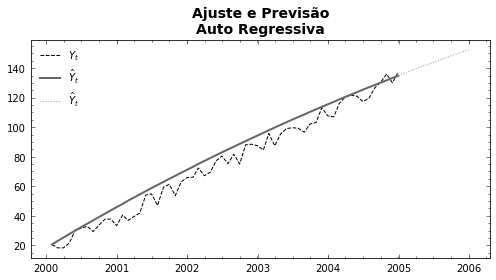

In [133]:
fig, ax = plt.subplots()

tspplot(df['Y'], ax=ax, label='$Y_t$',linestyle='dashed')
tspplot(df['Y_hat'], ax=ax, label='$\hat{Y}_t$',lw=2,alpha=0.5)
tspplot(forecast['Y_hat'], ax=ax, label='$\hat{Y}_t$',linestyle='dotted',alpha=0.5,title='Ajuste e Previsão\nAuto Regressiva')

Podemos considerar também modelos de mais alta ordem,

$$ Y_{t} = \beta^{'}_0 + \beta^{'}_1 Y_{t-1} + \beta^{'}_2 Y_{t-2} + \dots + \beta^{'}_n Y_{t-n}$$

Esse modelo é conhecido como modelo Auto Regressivo, AR, pois considera a correlação entre a os diferentes valores da própria variável nos tempos anteriores. A *janela* de termos anteriores, $[t-1, t-n]$, é conhecida como *lag*. Esse é um modelo bastante mais geral que o modelo anterior, e a base dos modelos que você aprenderá como o AR, ARMA e ARIMA a partir do próximo capítulo.


# Resíduos

O termo resíduo pode ser empregado também para designar a diferença entre a série real e o ajuste que você obteve. É claro que você deseja um menor resíduo para o seu ajuste, pois você quer que a diferença entre a série real e o seu ajuste seja pequena. Por exemplo, se empregassemos um modelo linear para ajustar uma série com comportamento exponencial teríamos um erro maior do que empregar o modelo exponencial no ajuste. 

Essa diferença pode ser medida de diversas formas, mas todas refletem ao final as diferenças a série real $Y_t$ e os valores estimados $\hat Y_t$. Algumas dessas medidas por serem bastante empregadas recebem nomes especiais como:

* **MAE**, Erro Médio Absoluto (*Mean Absolute Error*)

$$R = \frac{1}{n} \sum | Y_t - \hat Y_t |$$

* **MSE**, Erro Médio Quadrático (*Mean Square Error*)

$$R = \frac{1}{n} \sum ( Y_t - \hat Y_t )^2$$

* **RMSE**, Raiz do Erro Médio Quadrático (*Root Mean Square Error*)

$$R = \sqrt{ \frac{1}{n} \sum ( Y_t - \hat Y_t )^2 } $$

Essas métricas são uma medida de qualidade do ajuste dos modelos e você pode empregá-las para decidir entre dois modelos diferentes qual se ajusta melhor aos dados. Esses valores podem ser facilmente calculados, mas a maioria dos pacotes irá fornecer esses valores automaticamente para você. 

In [134]:
# calculate manually
r = df['Y'] - df['Y_hat']
mse_f = np.mean(r**2)
mae_f = np.mean(abs(r))
rmse_f = np.sqrt(mse_f)

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)


Results by manual calculation:
MAE: 6.064983910424335
MSE: 52.84934942441055
RMSE: 7.269755802254333


Mais adiante você verá que não só é importante analisarmos os valor desses resíduos mas também a sua distribuição ao longo da série.

# Sazonalidade

Até agora empregamos apenas séries com tendência. Mas um grande número de séries importantes apresenta também comportamentos sazonais. Embora possa haver séries sazonais sem uma tendência (na verdade o mais correto é dizer que a tendência é estacionária), vamos tratar do caso mais geral, em que encontramos tanto tendências como sazonalidade, e verificar, do mesmo modo como fizemos antes para tendência, como podemos decompor essa série e extrair suas características para fazer predições. Vamos começar empregando nossa série simulada `simulate_ts1` que possui sazonalidade e uma tendência linear. 

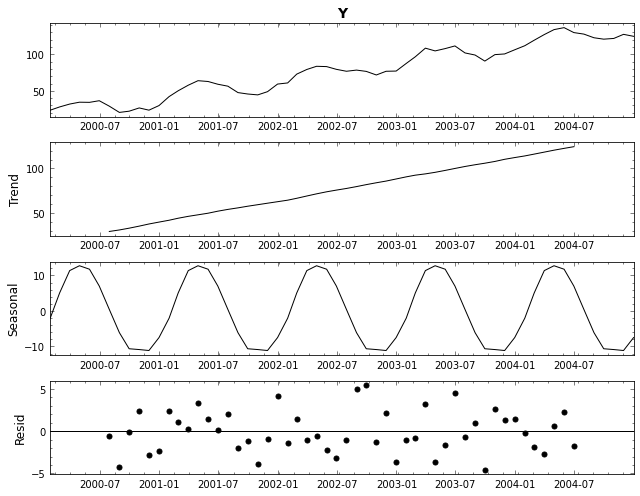

In [ ]:
df = f(seasons_month_len=12)

## Retirando a Tendência

É claro que uma inspeção visual inicial da série é útil para identificarmos possíveis sazonalidades e vamos ver alguns gráficos e técnicas úteis para isso. Mas um primeiro passo aqui será você extrair a tendência da série para que possamos observar a série *limpa* de tendências e, portanto, observar a série somente em sua sazonalidade e resíduos. Podemos fazer isso empregando o método das diferenças que vimos antes, e retirando a tendência estimada da série original. 

In [ ]:
df.head()

,t,Y,T,S,R
2000-01-31,0,23.485305,1,0.000000,11.769170
2000-02-29,1,27.934092,3,6.000000,8.217957
2000-03-31,2,31.879622,5,10.392305,5.771183
2000-04-30,3,34.421545,7,12.000000,4.705410
2000-05-31,4,34.226576,9,10.392305,4.118136


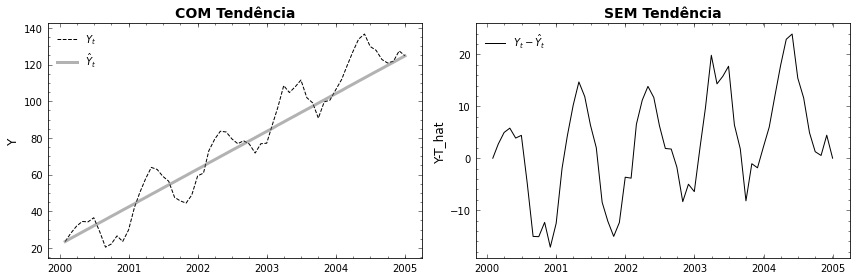

In [ ]:
np.random.seed(123)

df['dY'] = df['Y'].diff()

# df['Y_hat'] = df.iloc[df.index.min()]['Y'] + df['dY'].cumsum() 
df['Y_hat'] = df.iloc[0]['Y'] + df['dY'].mean() * df['t']
# display(df.head())

fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.lineplot(x=df.index, y=df['Y'], ax=ax[0], label='$Y_t$',linestyle='dashed')
sns.lineplot(x=df.index, y=df['Y_hat'], ax=ax[0], label='$\hat{Y}_t$',lw=3,alpha=0.5)

ax[0].set_title('COM Tendência')

df['Y-T_hat'] = df['Y'] - df['Y_hat']

sns.lineplot(x=df.index, y=df['Y-T_hat'] , ax=ax[1], label='$Y_t- \hat{Y}_t$')
ax[1].set_title('SEM Tendência')

plt.legend()
plt.tight_layout()
plt.show()


Lembre que consideramos basicamentte dois tipos de séries, as *aditivas* e as *multiplicativas*. Obtemos assim a série sem tendências:

$$ Y_t - \hat{T}_t = S_t + R_t $$

Se a série tem composição aditiva, e:

$$ Y_t \space / \space \hat{T}_t = S_t \times R_t $$

se a série tem composição multiplicativa. 

No exemplo, nossa série é aditiva, e empregamos $ Y_t - \hat{T}_t = S_t + R_t $ para obter uma série sem tendência. Na nova série obtida é mais fácil identificar as sazonalidades e, a exemplo do que fizemos com a série de diferenças obtida da série original, vamos empregar esta série derivada para extrair o comportamento sazonal da série original. A nova série é composta somente da sazonalidade e da parte que não temos como extrair o comportamento, isto é, seus os resíduos.

## Identificando a Periodicidade

Existem várias visualizações de dados úteis para identificarmos periodicidades, ou comportamentos sazonais das séries. Um caso frequente é o das séries com dados mensais e podemos fazer gráficos dos valores de cada mês, de cada trimestre ou de cada semestre, para buscar indentificar sazonalidades mensais, trimestrais ou semestrais. 

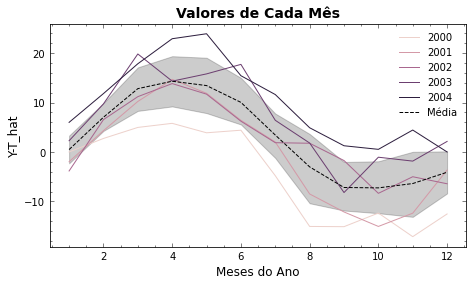

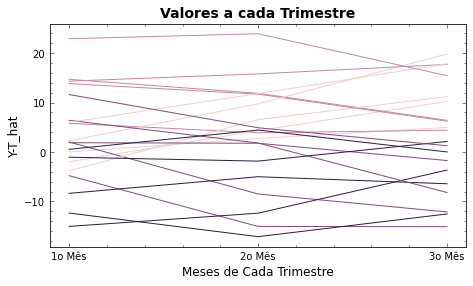

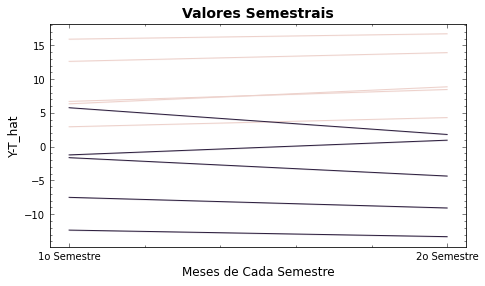

In [ ]:
df['month'] = df.index.month
df['year'] = df.index.year
df['quarter'] = df.index.quarter
df['quarter_seq'] = [ ( x % 3 if x % 3 != 0 else 3 ) for x in df['month'] ]

df['semester'] = 1 + (df.index.month > 6)
df['semester_seq'] = [ ( x % 2 if x % 2 != 0 else 2 ) for x in df['month'] ]

df['day'] = df.index.dayofweek  # the x-axis (freq)
# df['week'] = df.index.week  # the seasonal period (period)

df['dayofyear'] = df.index.dayofyear

from matplotlib.lines import Line2D

fig, ax = plt.subplots()  
ax = sns.lineplot(x='month',y='Y-T_hat',hue='year',data=df,ci=False,ax=ax,legend=True)
ax = sns.lineplot(x='month',y='Y-T_hat',data=df,ax=ax,color='k',label='Média',linestyle='dashed')
plt.title('Valores de Cada Mês')
plt.xlabel('Meses do Ano')
plt.legend()
plt.show()

fig, ax = plt.subplots() 
for year in df['year'].unique():
  ax = sns.lineplot(x='quarter_seq',y='Y-T_hat',hue='quarter',data=df[ df.year == year ],ci=False,ax=ax,legend=False)
plt.xticks(ticks=np.arange(1,4,1),labels=['1o Mês','2o Mês','3o Mês'])
plt.xlabel('Meses de Cada Trimestre')
plt.title('Valores a cada Trimestre')
plt.show()

fig, ax = plt.subplots()
for year in df['year'].unique():
  ax = sns.lineplot(x='semester_seq',y='Y-T_hat',hue='semester',data=df[ df.year == year ],ci=False,ax=ax,legend=False)

plt.xticks(ticks=np.arange(1,3,1),labels=['1o Semestre','2o Semestre'])
plt.xlabel('Meses de Cada Semestre')
plt.title('Valores Semestrais')
plt.show()

Note que é mais fácil identificar o padrão de sazonalidade nesses gráficos se a série é estacionária com relação à tendência. Caso contrário os valores de cada mês, trimestre ou semestre apareceriam em nível diferentes de acordo com a tendência da série. 

Fica evidente no exemplo um comportamento mensal dos dados, um padrão que é seguido mais ou menos ao longo dos meses do ano. 

Uma outra forma de entendermos a periodicidade é entender que os valores da série encontram-se em uma mesma faixa de valores para um mesmo ponto do período da série. 

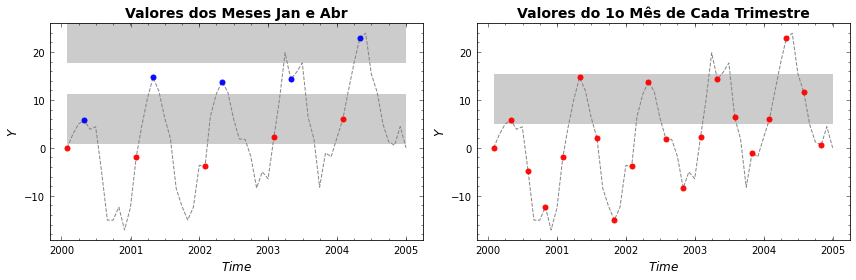

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].plot(df.index,df['Y-T_hat'],alpha  = 0.95, color='grey' , linestyle='dashed')

for year in df['year'].unique():
  ax[0].plot(df[ (df['year'] == year) & (df['month'] == 1) ].index,df[ (df['year'] == year) & (df['month'] == 1) ]['Y-T_hat'],'or',alpha  = 0.95,label=year,lw=4)
  ax[0].plot(df[ (df['year'] == year) & (df['month'] == 4) ].index,df[ (df['year'] == year) & (df['month'] == 4) ]['Y-T_hat'],'ob',alpha  = 0.95,label=year,lw=4)

ax[0].hlines(df[ (df['year'] == year) & (df['month'] == 1) ]['Y-T_hat'].mean(), xmin=df.index.min(), xmax=df.index.max(),lw=50,alpha=0.2)
ax[0].hlines(df[ (df['year'] == year) & (df['month'] == 4) ]['Y-T_hat'].mean(), xmin=df.index.min(), xmax=df.index.max(),lw=50,alpha=0.2)

ax[0].set_title('Valores dos Meses Jan e Abr')
ax[0].set_ylabel('$Y$')
ax[0].set_xlabel('$Time$')

ax[1].plot(df.index,df['Y-T_hat'],alpha  = 0.95, color='grey' , linestyle='dashed')

for year in df['year'].unique():
  ax[1].plot(df[ (df['year'] == year) & (df['quarter_seq'] == 1) ].index,df[ (df['year'] == year) & (df['quarter_seq'] == 1) ]['Y-T_hat'],'or',alpha  = 0.95,label=year,lw=4)
#   ax.plot(df[ (df['year'] == year) & (df['quarter'] == 3) ].index,df[ (df['year'] == year) & (df['quarter'] == 3) ]['Y-T_hat'],'ob',alpha  = 0.95,label=year,lw=4)

ax[1].hlines(df[ (df['year'] == year) & (df['quarter_seq'] == 1) ]['Y-T_hat'].mean(), xmin=df.index.min(), xmax=df.index.max(),lw=50,alpha=0.2)
# ax.hlines(df[ (df['year'] == year) & (df['quarter'] == 3) ]['Y-T_hat'].mean(), xmin=df.index.min(), xmax=df.index.max(),lw=50,alpha=0.2)

ax[1].set_title('Valores do 1o Mês de Cada Trimestre')
ax[1].set_ylabel('$Y$')
ax[1].set_xlabel('$Time$')

plt.tight_layout()
plt.show()

Assim, podemos ver que os valores dos meses de Jan e Abr se *repentem* dentro de uma mesma faixa de valores a cada ano, mas o mesmo não ocorre para o primeiro mês de cada trimestre. 

Procedimentos análogos também podem ser empregados para buscar sazonalidades semanais ou quinzenais em séries diárias, ou horárias, 12h ou 6h, para séries horárias etc. Esses são casos bastante comuns e dão conta de uma série de situações práticas da maior parte das séries temporais empregadas no dia a dia das engenharias e séries econômicas. Mas há casos mais complexos em que podemos não fazer qualquer ideia da periodicidade, como no caso dos ciclos solares que são de 11 anos. Para isso pode ser útil o periodograma. 

## Periodograma

O periodograma é empregado particularmente em séries de dados das áreas de ciências em que os perídos, diferentemente dos fenômenos financeiros e comerciais, regidos muitas vezes por sazonalidades do comportamento humano, podem apresentar períodos muito variados de sazonalidade. O periodograma se baseia em fazer uma análise do *spectro* (a totalidade da faixa de valores) das frequências (o inverso do período) da série, e apresenta em diferentes níveis os períodos mais frequentemente encontrados. 

,frequencies,spectrum,periods
5,5.0,65.029550,12.0
1,1.0,17.979187,60.0
2,2.0,4.133328,30.0
3,3.0,3.984277,20.0
4,4.0,1.354821,15.0


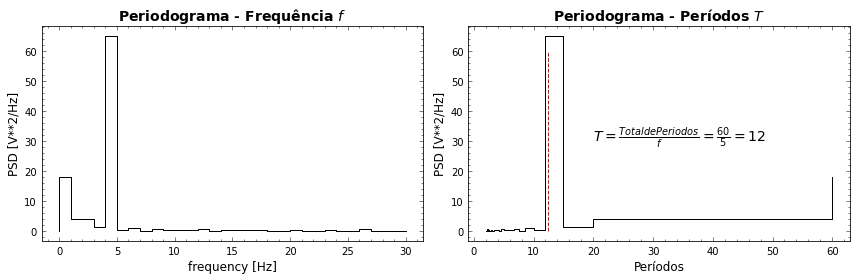

In [ ]:
from scipy import signal

fig, ax = plt.subplots(1,2, figsize=(12,4))

frequencies, spectrum = signal.periodogram(df['Y-T_hat'],fs=len(df)) 

# the same can be done here:
# frequencies, spectrum = signal.periodogram(df['Y'],fs=12,detrend='linear') 

ax[0].step(frequencies, spectrum)

ax[0].set_title('Periodograma - Frequência $f$')
ax[0].set_xlabel('frequency [Hz]')
ax[0].set_ylabel('PSD [V**2/Hz]')
 
dfft = pd.DataFrame()
dfft['frequencies'], dfft['spectrum'] = frequencies, spectrum  
dfft['periods'] = len(df) / dfft['frequencies']
display(dfft.sort_values('spectrum',ascending=False).head())

ax[1].step(dfft.periods, dfft.spectrum)

ax[1].set_title('Periodograma - Períodos $T$')
ax[1].set_xlabel('Períodos')
ax[1].set_ylabel('PSD [V**2/Hz]')

ax[1].vlines(12.5,0,60,linestyle='dashed',color='r')
ax[1].text(20,30,'$T = \\frac{ Total de Periodos }{f} = \\frac{60}{5} = 12$', fontsize=14)

plt.tight_layout()
plt.show()




No caso da nossa série a periodicidade mensal é a única relavante. Há casos em que podem haver múltiplas peridodicidades ao mesmo tempo em uma série. Mas não empregaremos séries como essas aqui.

O periodograma encontra mais aplicação na ciência e em aplicações mais complexas onde, em geral, uma análise no domínio da frequência é feito. Nosso propósito aqui está principalmente em uma análise das séries no domínio do tempo e para implementação de modelos como o ARIMA, em geral, são empregadas outras técnicas (como o ACF e PACF) para a determinação das sazonalidades. 

## Estimando a Sazonalidade pelos Valores Médios

Do mesmo modo que modelamos o comportamento médio da tendência da série podemos agora empregar valores médios de cada período da sazonalidade da série sem tendência para fazermos estimativas da sazonalidade.

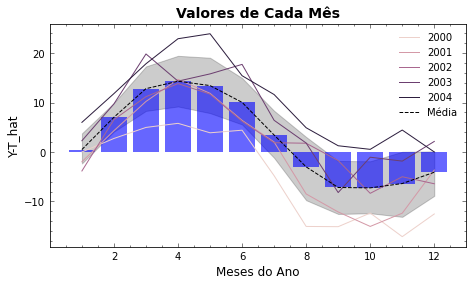

In [ ]:
fig, ax = plt.subplots()  
ax = sns.lineplot(x='month',y='Y-T_hat',hue='year',data=df,ci=False,ax=ax,legend=True)
plt.bar(x=df.groupby('month')['Y-T_hat'].mean().index,height=df.groupby('month')['Y-T_hat'].mean().values,color='b',alpha=0.6)
ax = sns.lineplot(x='month',y='Y-T_hat',data=df,ax=ax,color='k',label='Média',linestyle='dashed')
plt.title('Valores de Cada Mês')
plt.xlabel('Meses do Ano')
plt.legend()
plt.show()

Como identificamos uma sazonalidade é mensal, obtemos os valores médios de cada mês em cada ano, isto é, o valor médio de Jan para todos os anos da série, o valor médio de Fev para todos os anos da série, e assim sucessivamente. Esses valores permitem reproduzir o comportamento médio da sazonalidade da série.

> **Atenção: não confunda esses valores médios empregados para capturar a sazonalidades com o conceito de médias móveis que você verá no próximo capítulo. Esse é um erro bastante comum que se faz.** 

In [ ]:
df.groupby('month')['Y-T_hat'].mean() 

month
1      0.487590
2      7.023447
3     12.804535
4     14.306394
5     13.426864
6     10.030079
7      3.421169
8     -3.017721
9     -7.186571
10    -7.262975
11    -6.387582
12    -4.099630
Name: Y-T_hat, dtype: float64

Podemos então reconstruir a série sazonal e verificar o ajuste que o uso das médias fornece.

In [ ]:
df_S_hat = pd.DataFrame( df.groupby('month')['Y-T_hat'].mean() ).reset_index()
df_S_hat.rename(columns = {'Y-T_hat':'S_hat'},inplace=True)
# df_S_hat
df = df.reset_index().merge(df_S_hat, on='month').sort_values('index').set_index('index')
df.index.name = ''
# df.head()

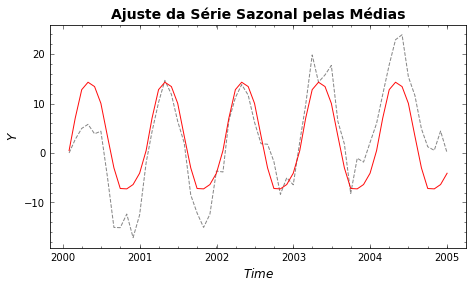

In [ ]:
fig, ax = plt.subplots() 

ax.plot(df.index,df['Y-T_hat'],alpha  = 0.95, color='grey' , linestyle='dashed')
ax.plot(df.index,df['S_hat'],alpha  = 0.95, color='red' )

plt.title('Ajuste da Série Sazonal pelas Médias')
plt.ylabel('$Y$')
plt.xlabel('$Time$')
plt.show()

## Recontruindo a Série Original

Você pode, finalmente, empregar agora as decomposições de tendência e sazonalidade para reconstruir a série original.

In [ ]:
# df['Y_hat'] = df.iloc[df.index.min()]['Y'] + df['dY'].cumsum() 
df['T_hat'] = df.iloc[0]['Y'] + df['dY'].mean() * df['t']
df['Y_hat'] = df['T_hat'] + df['S_hat']

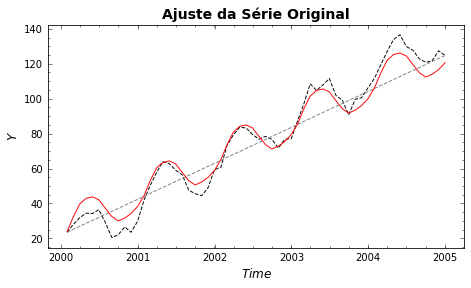

In [ ]:
fig, ax = plt.subplots() 

ax.plot(df.index,df['Y'],alpha  = 0.95, color='k' , linestyle='dashed')
ax.plot(df.index,df['T_hat'],alpha  = 0.95, color='grey' , linestyle='dashed')
ax.plot(df.index,df['Y_hat'],alpha  = 0.95, color='red' )

plt.title('Ajuste da Série Original')
plt.ylabel('$Y$')
plt.xlabel('$Time$')
plt.show()

## Distribuição dos Resíduos

Você pode, como antes, medir o resíduo do ajuste efetuado.

In [ ]:
# calculate manually
r = df['Y'] - df['Y_hat']
mse_f = np.mean(r**2)
mae_f = np.mean(abs(r))
rmse_f = np.sqrt(mse_f)

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)


Results by manual calculation:
MAE: 4.860801698736231
MSE: 33.30218591807752
RMSE: 5.770804616175939


Mas uma análise normalmente empregada, além dessas métricas absolutas, está em se verificar a distribuição dos resíduos.

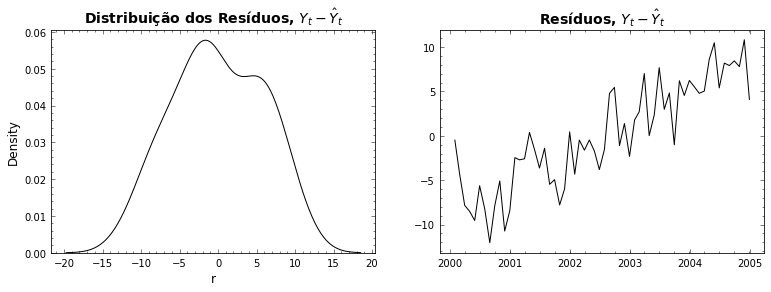

In [ ]:
df['r'] = r

fig, ( ax1, ax2 ) = plt.subplots(1, 2, figsize=(12,4))
    

sns.kdeplot(df['r'], ax=ax1)
ax1.set_title('Distribuição dos Resíduos, $Y_t - \hat{Y}_t$')
ax2.plot( df.index, df['r'])
ax2.set_title('Resíduos, $Y_t - \hat{Y}_t$')

plt.show()

Nossos resíduos apresentam uma distribuição normal, o que é o desejável, uma vez que não queremos que os erros tenham uma tendência na sua distribuição, por exempl, para valores maiores ou menores. Isso pode ser verificado também empregando um plot comparando-se a distribuição dos valores com uma distribuição teórica normal. 

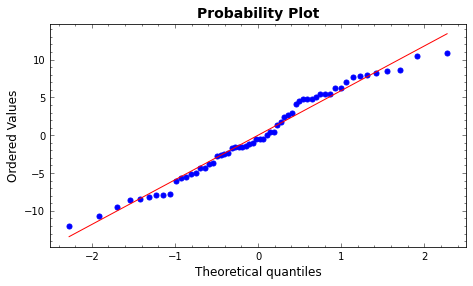

In [ ]:
# https://towardsdatascience.com/time-series-forecasting-prediction-intervals-360b1bf4b085

from scipy import stats

plt.figure()
res = stats.probplot(df['r'], plot=plt)

Desvios com relação à diagonal indicariam desvios à distribuição normal dos erros.

## Previsão

Seguros do ajuste da nossa série e da distribuição dos erros, você pode empregar agora o modelo para fazer previsões de novos valores do mesmo modo que antes.

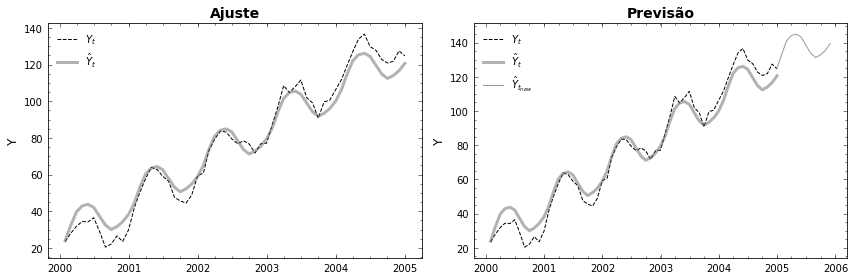

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.lineplot(x=df.index, y=df['Y'], ax=ax[0], label='$Y_t$',linestyle='dashed')
sns.lineplot(x=df.index, y=df['Y_hat'], ax=ax[0], label='$\hat{Y}_t$',lw=3,alpha=0.5)

ax[0].set_title('Ajuste')

forecast = pd.DataFrame()
forecast.index = pd.date_range(start=df.index.max(), periods=12, freq='M')
forecast['t'] = np.arange(len(forecast)) + df['t'].max()
# df['Y_hat'] = df.iloc[df.index.min()]['Y'] + df['dY'].cumsum() 
forecast['T_hat'] = df.iloc[0]['Y'] + df['dY'].mean() * forecast['t']
forecast['Y_hat'] = forecast['T_hat'] + df.iloc[0:12]['S_hat'].values

# display(df.tail())
# display(forecast)
sns.lineplot(x=df.index, y=df['Y'], ax=ax[1], label='$Y_t$',linestyle='dashed')
sns.lineplot(x=df.index, y=df['Y_hat'], ax=ax[1], label='$\hat{Y}_t$',lw=3,alpha=0.5)
sns.lineplot(x=forecast.index, y=forecast['Y_hat'], ax=ax[1], label='$\hat{Y}_{t_{new}}$',linestyle='solid')


ax[1].set_title('Previsão')


plt.legend()
plt.tight_layout()
plt.show()


Os procedimentos para séries multiplicativas são também análogos e, embora tenhamos aplicado até aqui a uma série de dados sintética podemos igualmente aplicar a dados reais como a série de dados `pharma_sales`. 

In [ ]:
df_ts1 = df.copy()
forecast_ts1 = forecast.copy()

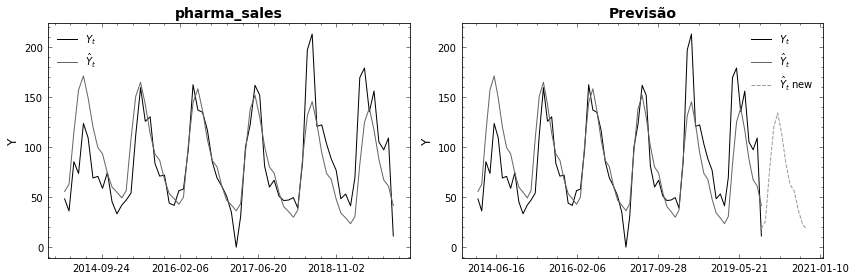

In [ ]:
fname = 'pharma_sales.csv'
df = pd.read_csv(path + fname,index_col=0,parse_dates=True)

df['Y'] = df['R06'] 

df['t'] = np.arange(len(df))
df['dY'] = df['Y'].diff()
df['T_hat'] = df.iloc[0]['Y'] + df['dY'].mean() * df['t']
# display(df.head())
df['Y-T_hat'] = df['Y'] - df['T_hat']

df['month'] = df.index.month
df_S_hat = pd.DataFrame( df.groupby('month')['Y-T_hat'].mean() ).reset_index()
df_S_hat.rename(columns = {'Y-T_hat':'S_hat'},inplace=True)
# df_S_hat
df = df.reset_index().merge(df_S_hat, on='month').sort_values('index').set_index('index')
df.index.name = ''
# df.head()
df['Y_hat'] = df['T_hat'] + df['S_hat']

fig, ax = plt.subplots(1,2,figsize=(12,4))

sns.lineplot(x=df.index, y=df['Y'], ax=ax[0], label='$Y_t$')
sns.lineplot(x=df.index, y=df['Y_hat'], ax=ax[0], label='$\hat{Y}_t$')
ax[0].set_title(fname.split('.csv')[0])
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(5))

forecast = pd.DataFrame()
forecast.index = pd.date_range(start=df.index.max(), periods=12, freq='M')
forecast['t'] = np.arange(len(forecast)) + df['t'].max()
# df['Y_hat'] = df.iloc[df.index.min()]['Y'] + df['dY'].cumsum() 
forecast['T_hat'] = df.iloc[0]['Y'] + df['dY'].mean() * forecast['t']
forecast['Y_hat'] = forecast['T_hat'] + df.iloc[0:12]['S_hat'].values

sns.lineplot(x=df.index, y=df['Y'], ax=ax[1], label='$Y_t$')
sns.lineplot(x=df.index, y=df['Y_hat'], ax=ax[1], label='$\hat{Y}_t$')
sns.lineplot(x=forecast.index, y=forecast['Y_hat'], ax=ax[1], label='$\hat{Y}_t$ new', linestyle='dashed')
ax[1].set_title('Previsão')
ax[1].xaxis.set_major_locator(ticker.MaxNLocator(5))

plt.tight_layout()
plt.show()

Neste caso omitimos as análises, mas é fácil ver que os dados tem uma sazonalidade mensal e, embora não haja uma tendência acentuada ela também foi considerada para o ajuste da série e a previsão.

De qualquer modo é importante para cada modelo uma análise de métricas que indiquema a qualidade do seu modelo. Mais adiante veremos outras métricas, mas por hora, vamos nos contentar de medir o erro e analisar a distribuição dos resíduos.

In [ ]:
# calculate manually
r = df['Y'] - df['Y_hat']
mse_f = np.mean(r**2)
mae_f = np.mean(abs(r))
rmse_f = np.sqrt(mse_f)

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)


Results by manual calculation:
MAE: 21.735969772256727
MSE: 848.3700423313528
RMSE: 29.126792517051253


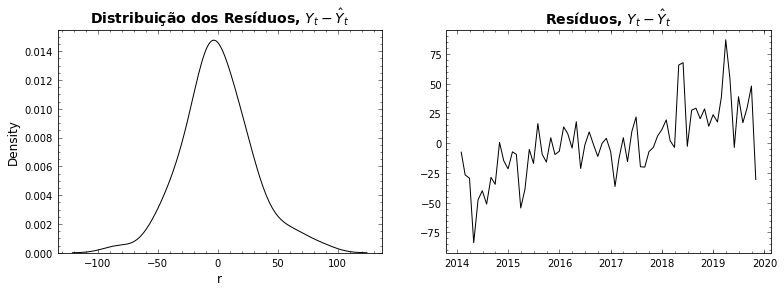

In [ ]:
df['r'] = r

fig, ( ax1, ax2 ) = plt.subplots(1, 2, figsize=(12,4))
    

sns.kdeplot(df['r'], ax=ax1)
ax1.set_title('Distribuição dos Resíduos, $Y_t - \hat{Y}_t$')
ax2.plot( df.index, df['r'])
ax2.set_title('Resíduos, $Y_t - \hat{Y}_t$')

plt.show()

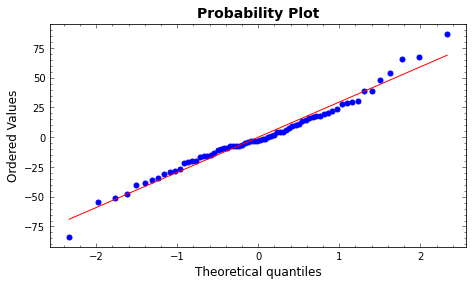

In [ ]:
# https://towardsdatascience.com/time-series-forecasting-prediction-intervals-360b1bf4b085

from scipy import stats

plt.figure()
res = stats.probplot(df['r'], plot=plt)

Novamente nosso modelo, mesmo simples e agora aplicado a dados reais, apresenta resultados bastante satisfatórios e, certamente, fornecem uma previsão melhor da série que quaisquer previsão ingênua baseada apenas na nossa experiência e o nosso olhar sobre os dados. 

In [ ]:
df_pharma_sales = df.copy()
forecast_pharma_sales = forecast.copy()

# Intervalo de Confiança

Um ponto importante ao se fazer previsões é o de observarmos o *intervalo de confiança*, *IC*, dos valores previstos. Mesmo no ajuste da série os valores obtidos estão sujeitos a um intervalo de confiança. Por exemplo, se para quaisquer anos os valores do mês de Jan de uma série mensal apresenta sempre o mesmo valor, você terá mais certeza sobre a sua estimativa do que se esse valor tiver vários diferentes valores, com uma variação (variância ou desvio padrão) muito grande. Assim, a variância (ou seu par, o desvio padrão) dos valores empregados para a sua estimativa, são um bom indicativo do intervalo de confiança da sua previsão. 

Aqui, podemos empregar o desvio padrão para estimar o intervalo de confiança. Ele vai indicar o intervalo em torno do qual estimamos encontrar os valores com uma probabilidade de 95% (esse é o valor usualmente empregado embora possamos usar outros). Assim, você vai obter um intervalo de confiança maior ao longo do ajuste para intervalos de tempo com maior variação dos valores e, intervalos menores, quando a quantidade de valores diferentes (a variação) for menor. 

## IC das Previsões

Enquanto o IC do ajuste pode ser obtido apenas empregando-se os dados utilizados na estimativa da curva ajustada (para cada ponto, menos valores indicando um intervalo de confiança menor e, portanto, uma previsão melhor), para valores futuros não há um desvio padrão dos dados empregados. 

A ideia aqui é, então, estimarmos o intervalo do mesmo modo que estimamos os valores. Novamente existem diferentes técnicas que podem ser empregadas. Mas para os nossos propósitos é suficiente você entender que a cada novo período de previsão o intervalo de erro aumenta! Vamos entender isso: se você faz uma previsão para o período $t+1$ que já tem um erro, a previsão de mais um período $t+2$, sendo dependente do valor do período anterior estimado tende a aumentar o erro da previsão seguinte e assim sucessivamente. É o que chamamos de *propagação do erro*. Assim o IC, ou a *margem de erro*, aumenta a medida que nos distanciamos do período da série original. Uma forma comum de estimarmos esse intervalo adicionarmos, a cada novo período, um intervalo de mesmo tamanho do intervalo de erro anterior.





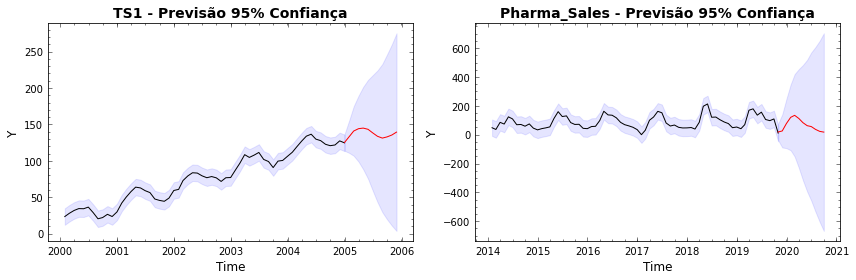

In [ ]:
# naive forecast from... 
# https://otexts.com/fpp2/prediction-intervals.html

df = df_ts1.copy()
forecast = forecast_ts1.copy()

RMSFE = np.sqrt(sum([x**2 for x in df['r']]) / len(df['r']))
band_size = 1.96*RMSFE

forecast['step'] = np.arange(1,len(forecast)+1)
forecast['band_size'] = forecast['step'] * band_size 

fig, ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(df.index, df['Y'], color='k', label='Valid')
# ax.scatter(df.index, df['Y_hat'])
ax[0].fill_between(df.index, (df['Y']-band_size), (df['Y']+band_size), color='b', alpha=.1)

ax[0].plot( forecast.index,forecast['Y_hat'],'r' )
ax[0].fill_between(forecast.index, (forecast['Y_hat']-forecast['band_size']), (forecast['Y_hat']+forecast['band_size']), color='b', alpha=.1)

ax[0].set_title("TS1 - Previsão 95% Confiança")
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Y')

df = df_pharma_sales.copy()
forecast = forecast_pharma_sales.copy()

RMSFE = np.sqrt(sum([x**2 for x in df['r']]) / len(df['r']))
band_size = 1.96*RMSFE

forecast['step'] = np.arange(1,len(forecast)+1)
forecast['band_size'] = forecast['step'] * band_size 

ax[1].plot(df.index, df['Y'], color='k', label='Valid')
# ax.scatter(df.index, df['Y_hat'])
ax[1].fill_between(df.index, (df['Y']-band_size), (df['Y']+band_size), color='b', alpha=.1)

ax[1].plot( forecast.index,forecast['Y_hat'],'r' )
ax[1].fill_between(forecast.index, (forecast['Y_hat']-forecast['band_size']), (forecast['Y_hat']+forecast['band_size']), color='b', alpha=.1)

ax[1].set_title("Pharma_Sales - Previsão 95% Confiança")
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Y')

plt.tight_layout()
plt.show()

Como você pode ver as estimativas ficam, a cada período com mais incerteza, o que é o esperado. É, de qualquer modo, um análise essencial ao fazermos previsões. 

# Teste de Estacionariedade 

Um Teste de Estacionariedade é um teste para verificar se uma série temporal é ou não estacionária de modo (estatisticamente) significativo. Existem muitos testes de estacionariedade, mas um teste bastante popular e empregado é o teste **ADF Augmented Dickey-Fuller**. É um dos testes mais simples e você pode buscar outros testes mais elaborados se precisar aplicá-los de fato. Na prática, todos testes são limitados a poucas características de não estacionariadade, e pode ser necessário aplicar mais que um e, mesmo, uma inspeção visual pode ser às vezes mais importante e reveladora.

Aqui a hipótese nula do teste é que a série temporal pode ser representada por uma raiz unitária, que não é estacionária (tem alguma estrutura dependente do tempo). A hipótese alternativa (rejeitando a hipótese nula) é que a série temporal é estacionária.

Assim, de modo prático,

$p-valor \gt 0,05$ : Falha ao rejeitar a hipótese nula ($H0$), **a série não é estacionária**.

$p-value \le 0.05$ : Rejeitar a hipótese nula ($H0$), **a série é estacionária**.

In [ ]:
# f(nr_months=60, beta_0=1, beta_1=2, beta_2=0, beta_3=0, alpha=0.2, seasons_month_len=10, noise=0.2, model='additive', show_plot=True) 

df1 = f(seasons_month_len=12, show_plot=False)
df2 = simulate_ts1_f(nr_months=120, beta_1=-2, seasons_month_len=6, noise=0.9, model='additive', show_plot=False)
 

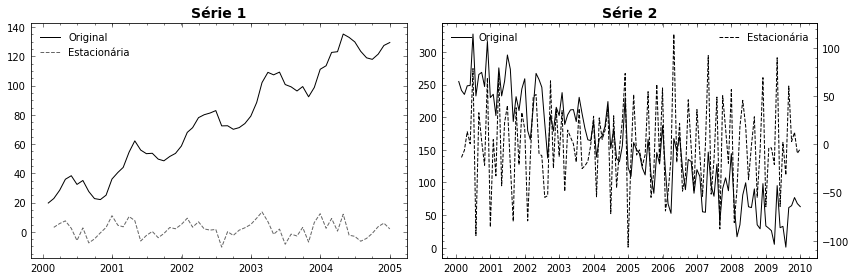

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
    
ax[0].plot( df1.index, df1['Y'],label='Original')
ax[0].plot( df1.index, df1['Y'].diff(),linestyle='dashed',label='Estacionária')
ax[0].set_title('Série 1')
ax[0].legend()

ax[1].plot( df2.index, df2['Y'],label='Original')
ax2 = ax[1].twinx()
ax2.plot( df2.index, df2['Y'].diff(),linestyle='dashed',label='Estacionária')
ax[1].set_title('Série 2')
ax[1].legend(loc='upper left')
ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

X = df1['Y']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.250724
p-value: 0.974967
Critical Values:
	1%: -3.571
	5%: -2.923
	10%: -2.599


Ou, se preferir uma versão mais simplificada, 

In [ ]:
def isSeriesStationary(series):
  pValue = adfuller(series)[1]
  if pValue > 0.05:
      return False
  else:
      return True

print( isSeriesStationary(df1['Y']) )
print( isSeriesStationary(df2['Y']) )  

print( isSeriesStationary(df1['Y'].diff().dropna()) )
print( isSeriesStationary(df2['Y'].diff().dropna()) )  

False
False
True
True


# Random Walk: Valores Aleatórios

Um caso especial de Série Temporal que você pode encontrar é quando a Série não apresenta de fato uma dependendência temporal mas é constituída de valores aleatórios. Embora apareçam diferentes valores no tempo eles não tem correlação com valores anteriores ou mesmo com o período. Séries como essa apresentam um gráfico de Auto Correlação e Auto Correlação Parcial muito característicos e para esse tipo de Série modelos estatísticos sofisticados (do AR, MA, ARIMA ou mais) e mesmo modelos de aprendizado de máquina podem fazer pouco, sendo preferível o uso de modelos bastante simples de médias.

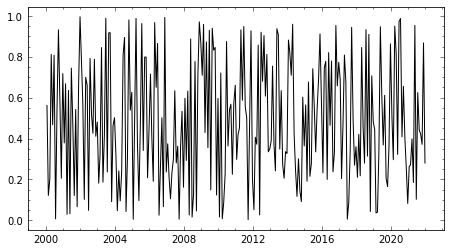

In [ ]:
index_dates = pd.date_range(start='1/1/2000', end='1/1/2022', freq='M')
values = np.random.sample( len(index_dates) )  
random_walk = pd.DataFrame()
random_walk.index = index_dates 
random_walk['values'] = values

fig, ax = plt.subplots()
    
ax.plot( random_walk)

plt.show()  

Outro caso não estocástico, mas determinístico, e que não temos como prever pelos métodos tradicionais são as Séries que apresentam comportamento *caótico*, como o comportamento apresentado pelo mapa logístico a seguir que entra em regime de *caos* para determinados valores e condições iniciais. 

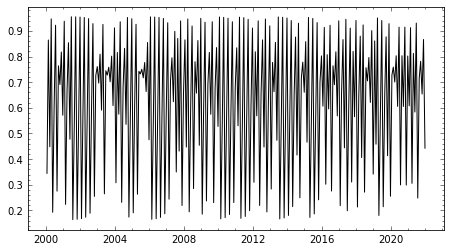

In [ ]:
def mapa_logistico(x0,mu):
  x1 = mu*x0*(1-x0)
  return x1

index_dates = pd.date_range(start='1/1/2000', end='1/1/2022', freq='M')
values = np.random.sample( len(index_dates) )  
chaos_series = pd.DataFrame()
chaos_series.index = index_dates 

logistic_values = []

x0 = 0.1
mu = 3.82843 

for i in range(len(chaos_series)):
  x0 = mapa_logistico(x0,mu)
  logistic_values.append(x0)

chaos_series['values'] = logistic_values

fig, ax = plt.subplots()
    
# ax.plot(chaos_series.iloc[0:6].values)
ax.plot(chaos_series)

plt.show()  



# Para Saber Mais

Para introdução ao uso dos pacotes `Pandas` e `Matplotlib` acesse: 

* Jake VanderPlas. **Python Data Science Handbook** O'Reilly Media, Inc. (2016). ISBN: 9781491912058. Disponível em: https://jakevdp.github.io/PythonDataScienceHandbook/. 

Há também na seção *Working with Time Series* à manipulação de dados de Séries Temporais e o uso de datas.

<br>

Acesse também a documentação oficial das bibliotecas. Lá você vai poder encontrar uma série de tutoriais, exemplos e a documentação completa dos pacotes.

* `Pandas`, https://pandas.pydata.org/, 

* `Matplotlib`, https://matplotlib.org, 

* `Statsmodel` https://statsmodels.org


